<a href="https://colab.research.google.com/github/RahulAdyaa/Punjabi-News-Sentiment-Analysis/blob/main/punjabi_news_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STARTING WITH SCRAPING


In [ ]:
pip install requests beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

#  CONFIGURATION
url = 'https://www.ajitjalandhar.com/story/20250502/51/4859888.cms'

#  SCRAPING
print(f"Attempting to fetch: {url}")
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
    response.encoding = 'utf-8'
    print("Successfully fetched page.")

    #  PARSING
    soup = BeautifulSoup(response.text, 'html.parser')


    article_container = soup.find('article', class_='entry mb-0')

    headline = "HEADLINE NOT FOUND"
    article_text = "ARTICLE TEXT NOT FOUND"

    if article_container:

        headline_tag = article_container.find('h1', class_='single-post__entry-title')
        if headline_tag:
            headline = headline_tag.get_text(strip=True)


        article_body_div = article_container.find('div', class_='entry__article')
        if article_body_div:

            paragraphs = article_body_div.find_all('p')

            article_text_parts = [p.get_text(strip=True) for p in paragraphs]

            article_text = "\n".join(article_text_parts)
        else:
             print("Could not find the div with class 'entry__article'")

    else:
        print("Could not find the main article container with class 'entry mb-0'")

    # --- OUTPUT ---
    print("\n--- Extracted Headline ---")
    print(headline)

    print("\n--- Extracted Article Body ---")
    print(article_text)




except requests.exceptions.RequestException as e:
    print(f"Error fetching URL: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

# time.sleep(2) # Pause if you were running this in a loop

Attempting to fetch: https://www.ajitjalandhar.com/story/20250502/51/4859888.cms
Successfully fetched page.

--- Extracted Headline ---
ਭਾਜਪਾ ਪੰਜਾਬ ਦਾ ਇਕ ਬੂੰਦ ਵੀ ਪਾਣੀ ਗੁਆਂਢੀ ਸੂਬਿਆਂ ਨੂੰ ਨਹੀਂ ਦੇਵੇਗੀ - ਸ਼ਵੇਤ ਮਲਿਕ

--- Extracted Article Body ---
ਅੰਮ੍ਰਿਤਸਰ, 2 ਮਈ (ਹਰਮਿੰਦਰ ਸਿੰਘ)-ਭਾਰਤੀ ਜਨਤਾ ਪਾਰਟੀ ਪੰਜਾਬ ਦਾ ਇਕ ਬੂੰਦ ਵੀ ਪਾਣੀ ਗੁਆਂਢੀ ਸੂਬਿਆਂ ਨੂੰ ਨਹੀਂ ਦੇਵੇਗੀ। ਇਹ ਪ੍ਰਗਟਾਵਾ ਭਾਜਪਾ ਦੇ ਸਾਬਕਾ ਸੂਬਾ ਪ੍ਰਧਾਨ ਅਤੇ ਸਾਬਕਾ ਰਾਜ ਸਭਾ ਮੈਂਬਰ ਸ਼ਵੇਤ ਮਲਿਕ ਨੇ ਪੱਤਰਕਾਰਾਂ ਨਾਲ ਗੱਲਬਾਤ ਕਰਦਿਆਂ ਕੀਤਾ।
ਅੰਮ੍ਰਿਤਸਰ, 2 ਮਈ (ਹਰਮਿੰਦਰ ਸਿੰਘ)-ਭਾਰਤੀ ਜਨਤਾ ਪਾਰਟੀ ਪੰਜਾਬ ਦਾ ਇਕ ਬੂੰਦ ਵੀ ਪਾਣੀ ਗੁਆਂਢੀ ਸੂਬਿਆਂ ਨੂੰ ਨਹੀਂ ਦੇਵੇਗੀ। ਇਹ ਪ੍ਰਗਟਾਵਾ ਭਾਜਪਾ ਦੇ ਸਾਬਕਾ ਸੂਬਾ ਪ੍ਰਧਾਨ ਅਤੇ ਸਾਬਕਾ ਰਾਜ ਸਭਾ ਮੈਂਬਰ ਸ਼ਵੇਤ ਮਲਿਕ ਨੇ ਪੱਤਰਕਾਰਾਂ ਨਾਲ ਗੱਲਬਾਤ ਕਰਦਿਆਂ ਕੀਤਾ।


In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin

# Configuration
start_url = 'https://www.punjabitribuneonline.com/news/nation/'
output_csv_file = 'punjabi_tribune_nation_news.csv'
source_website = 'Punjabi Tribune'
max_articles = 10
crawl_delay = 5

#  Logging Setup

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Header for CSV ---
csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']



article_link_selector = 'h2.is-title.post-title a'


headline_selector = 'h1.is-title.post-title'
article_text_container_selector = 'div.entry-content'
date_selector = 'time.post-date'


headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0 (Contact: your-email@example.com)'
}


def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL."""
    try:
        logging.info(f"Requesting article: {article_url}")
        response = requests.get(article_url, headers=headers, timeout=20)

        print(f"--- Debug: Article page status for {article_url}: {response.status_code}")
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # -Extract Headline
        headline_element = soup.select_one(headline_selector)

        print(f"--- Debug: Headline element found using '{headline_selector}': {headline_element is not None}")
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"


        text_container = soup.select_one(article_text_container_selector)

        print(f"--- Debug: Text container found using '{article_text_container_selector}': {text_container is not None}")
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p', recursive=False)
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')


        date_element = soup.select_one(date_selector)

        print(f"--- Debug: Date element found using '{date_selector}': {date_element is not None}")
        publication_date = date_element.get_text(strip=True) if date_element else "Date not found"

        if headline == "Headline not found" and article_text == "Article text not found":
             logging.warning(f"Could not extract headline or body from {article_url}")


        logging.info(f"Scraped Data: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }

    except requests.exceptions.RequestException as e:
        logging.error(f"Network error scraping {article_url}: {e}")
        print(f"--- ERROR: Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"Error parsing {article_url}: {e}")
        print(f"--- ERROR: Error parsing {article_url}: {e}")

    return None


print("--- DEBUG: Main script logic starting NOW! ---")
article_urls = []
scraped_data = []
articles_scraped_count = 0

try:
    print(f"--- DEBUG: Fetching section page {start_url} ---")
    response = requests.get(start_url, headers=headers, timeout=20)
    print(f"--- DEBUG: Section page response status: {response.status_code}")
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')


    link_elements = soup.select(article_link_selector)
    print(f"--- DEBUG: Found {len(link_elements)} elements matching link selector '{article_link_selector}'")

    for link_element in link_elements:
        if 'href' in link_element.attrs:
            href = link_element['href']
            article_url = urljoin(start_url, href)
            if article_url not in article_urls:
                 article_urls.append(article_url)

    print(f"--- DEBUG: Collected {len(article_urls)} unique article URLs.")
    print(f"--- DEBUG: First 5 URLs collected: {article_urls[:5]}")


    # --- Scrape each article URL ---
    print(f"\n--- DEBUG: Starting loop to scrape max {max_articles} articles ---")
    for i, url in enumerate(article_urls):
        print(f"\n--- DEBUG: Processing URL {i+1}/{len(article_urls)}: {url} ---")
        if articles_scraped_count >= max_articles:
            print(f"--- DEBUG: Reached maximum article limit ({max_articles}). Stopping loop.")
            break

        article_data = scrape_article(url)
        if article_data:
            scraped_data.append(article_data)
            articles_scraped_count += 1
            print(f"--- DEBUG: Successfully processed article {articles_scraped_count}. Data appended.")
        else:
             print(f"--- DEBUG: Failed to process article {url}. Skipping.")


        print(f"--- DEBUG: Waiting for {crawl_delay} seconds before next request...")
        time.sleep(crawl_delay)

except requests.exceptions.RequestException as e:
    logging.error(f"Network error fetching section page {start_url}: {e}")
    print(f"--- ERROR: Network error fetching section page {start_url}: {e}")
except Exception as e:
    logging.error(f"Error parsing section page {start_url}: {e}")
    print(f"--- ERROR: Error parsing section page {start_url}: {e}")


# Write data to CSV
print("\n--- DEBUG: Checking if data needs to be written to CSV ---")
if scraped_data:
    print(f"--- DEBUG: Attempting to write {len(scraped_data)} rows to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header)
            writer.writeheader()
            writer.writerows(scraped_data)
        logging.info(f"Successfully saved {len(scraped_data)} articles to {output_csv_file}")
        print(f"--- SUCCESS: Saved {len(scraped_data)} articles to {output_csv_file} ---")
    except IOError as e:
        logging.error(f"Error writing to CSV file {output_csv_file}: {e}")
        print(f"--- ERROR: Error writing to CSV file {output_csv_file}: {e}")
else:
    logging.warning("No data was successfully scraped. CSV file not created.")
    print("--- WARNING: No data scraped, CSV file not created. ---")


print("\n--- DEBUG: Script finished. ---")

--- DEBUG: Main script logic starting NOW! ---
--- DEBUG: Fetching section page https://www.punjabitribuneonline.com/news/nation/ ---
--- DEBUG: Section page response status: 200
--- DEBUG: Found 30 elements matching link selector 'h2.is-title.post-title a'
--- DEBUG: Collected 30 unique article URLs.
--- DEBUG: First 5 URLs collected: ['https://www.punjabitribuneonline.com/news/nation/rahul-gandhi-eci-eci-calls-rahul-gandhis-allegations-of-maharashtra-election-rigging-baseless/', 'https://www.punjabitribuneonline.com/news/nation/unwell-sonia-gandhi-rushed-to-hospital-in-shimla-undergoing-various-tests-at-indira-gandhi-medical-college/', 'https://www.punjabitribuneonline.com/news/nation/naxal-encounter-five-naxalites-killed-in-encounters-in-bijapur-chhattisgarh/', 'https://www.punjabitribuneonline.com/news/chandigarh/nia-chargesheet-goldy-brar-nia-files-chargesheet-against-5-including-goldy-brar-in-gurugram-bomb-attack-case/', 'https://www.punjabitribuneonline.com/news/chandigarh/youtu

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin # To handle relative URLs if needed
#  Configuration
start_url = 'https://www.punjabitribuneonline.com/news/nation/'
output_csv_file = 'punjabi_tribune_nation_selenium_updated.csv'

source_website = 'Punjabi Tribune'
max_articles = 300
crawl_delay = 1


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Header for CSV
csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']


article_link_selector = 'h2.is-title.post-title a'
headline_selector = 'h1.is-title.post-title'
article_text_container_selector = 'div.entry-content'
date_selector = 'time.post-date'

#  User Agent
headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0 (Contact: your-email@example.com)'
}

# Function to scrape a single article
def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL."""
    try:

        logging.info(f"Requesting article: {article_url}")
        response = requests.get(article_url, headers=headers, timeout=20)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p', recursive=False)
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')

        date_element = soup.select_one(date_selector)
        publication_date = date_element.get_text(strip=True) if date_element else "Date not found"

        if headline == "Headline not found" and article_text == "Article text not found":
             logging.warning(f"Could not extract headline or body from {article_url}")

             pass

        logging.info(f"Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }

    except requests.exceptions.RequestException as e:
        logging.error(f"Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"Error parsing {article_url}: {e}")

    return None


print(f"--- Starting Scraper for {source_website} ---")
article_urls = []
scraped_data = []
articles_scraped_count = 0

try:
    print(f"Fetching section page: {start_url}")
    response = requests.get(start_url, headers=headers, timeout=20)
    response.raise_for_status()
    print(f"Section page status: {response.status_code}")
    soup = BeautifulSoup(response.content, 'html.parser')

    link_elements = soup.select(article_link_selector)
    print(f"Found {len(link_elements)} potential article link elements on section page.")

    for link_element in link_elements:
        if 'href' in link_element.attrs:
            href = link_element['href']
            article_url = urljoin(start_url, href)
            if article_url not in article_urls:
                 article_urls.append(article_url)

    print(f"Collected {len(article_urls)} unique article URLs to process (max {max_articles}).")


    for i, url in enumerate(article_urls):
        if articles_scraped_count >= max_articles:
            print(f"\nReached maximum article limit ({max_articles}). Stopping.")
            break

        print(f"\n--- Processing Article {articles_scraped_count + 1} / {max_articles} ---")
        article_data = scrape_article(url)

        if article_data:

            print(f"URL: {article_data['URL']}")
            print(f"Headline: {article_data['Headline']}")
            print(f"Date: {article_data['Publication Date']}")
            print(f"Text Snippet: {article_data['Article Text'][:150]}...")

            scraped_data.append(article_data)
            articles_scraped_count += 1
        else:
             print(f"--- Failed to scrape or process article {url} ---")


        print(f"--- Waiting for {crawl_delay} seconds... ---")
        time.sleep(crawl_delay)

except requests.exceptions.RequestException as e:
    print(f"--- ERROR: Network error fetching section page {start_url}: {e} ---")
except Exception as e:
    print(f"--- ERROR: Error processing section page {start_url}: {e} ---")



if scraped_data:
    print(f"\n--- Writing {len(scraped_data)} articles to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header)
            writer.writeheader()
            writer.writerows(scraped_data)
        print(f"--- SUCCESS: Data saved to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error writing to CSV file {output_csv_file}: {e} ---")
else:
    print("\n--- WARNING: No data was successfully scraped to write to CSV. ---")

print("\n--- Script finished. ---")

--- Starting Scraper for Punjabi Tribune ---
Fetching section page: https://www.punjabitribuneonline.com/news/nation/
Section page status: 200
Found 30 potential article link elements on section page.
Collected 30 unique article URLs to process (max 300).

--- Processing Article 1 / 300 ---
URL: https://www.punjabitribuneonline.com/news/nation/rahul-gandhi-eci-eci-calls-rahul-gandhis-allegations-of-maharashtra-election-rigging-baseless/
Headline: Rahul Gandhi – ECI: ਰਾਹੁਲ ਗਾਂਧੀ ਦੇ ਮਹਾਰਾਸ਼ਟਰ ਚੋਣ ਧਾਂਦਲੀ ਦੇ ਦੋਸ਼ਾਂ ਨੂੰ ECI ਨੇ ‘ਬੇਬੁਨਿਆਦ’ ਦੱਸਿਆ
Date: Published At: JUNE 7, 2025 07:00 PM (IST)
Text Snippet: ਨਵੀਂ ਦਿੱਲੀ, 7 ਜੂਨਕਾਂਗਰਸ ਸੰਸਦ ਮੈਂਬਰ ਅਤੇ ਲੋਕ ਸਭਾ ਵਿਚ ਵਿਰੋਧੀ ਧਿਰ ਦੇ ਆਗੂ (LoP) ਰਾਹੁਲ ਗਾਂਧੀ ਵੱਲੋਂ ਮਹਾਰਾਸ਼ਟਰ ਚੋਣਾਂ ਵਿਚ ਹੇਰਾਫੇਰੀ ਦੇ ਲਗਾਏ ਗਏ ਦੋਸ਼ਾਂ ਦੇ ਜਵਾਬ ਵਿ...
--- Waiting for 1 seconds... ---

--- Processing Article 2 / 300 ---
URL: https://www.punjabitribuneonline.com/news/nation/unwell-sonia-gandhi-rushed-to-hospital-in-shimla-undergoing-various-tests-at-indira-gandhi-medical-college/
Headline:

In [ ]:
pip install selenium webdriver-manager beautifulsoup4 requests

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.14.0
    Uninstalling typing_extensions-4.14.0:
      Successfully uninstalled typing_extensions-4.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 r

In [ ]:
# 1. Download the key and add the repository
!wget -q -O - https://dl.google.com/linux/linux_signing_key.pub | apt-key add -
!sh -c 'echo "deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main" >> /etc/apt/sources.list.d/google-chrome.list'

# 2. Update package list again to include Google's packages
!apt-get update

# 3. Install Google Chrome Stable
!apt-get install -y google-chrome-stable --no-install-recommends

# 4. Check the installation
!google-chrome --version
print("--- If the version printed above, Chrome is installed. ---")
print("--- The path is likely /opt/google/chrome/chrome or /usr/bin/google-chrome ---")

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,209 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,765 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-b

# THIS IS THE MAIN SCRAPING SCRIPT THROUGH WHICH I SCARPED MAXIMUM NEWS

In [ ]:

import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin
import tempfile
import os


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from webdriver_manager.chrome import ChromeDriverManager

#  Configuration
start_url = 'https://www.punjabitribuneonline.com/news/nation/'

output_csv_file = 'punjabi_tribune_nation_selenium_updated.csv'
source_website = 'Punjabi Tribune'

max_articles_per_run = 5000
article_scrape_delay = 3
load_more_delay = 5
max_load_more_attempts =1000

#  Logging Setup
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

#  Header for CSV

csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']

# CSS Selectors
load_more_button_selector = ".load-button"
article_container_selector = "div.listing"
article_link_selector = 'h2.is-title.post-title a'
headline_selector = 'h1.is-title.post-title'
article_text_container_selector = 'div.entry-content'
date_selector = 'time.post-date'


requests_headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0+Selenium (Contact: your-email@example.com)'
}


def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL using Requests."""
    try:
        logging.info(f"[Requests] Requesting article: {article_url}")
        response = requests.get(article_url, headers=requests_headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p', recursive=False)
            if not paragraphs or not any(p.get_text(strip=True) for p in paragraphs):
                 paragraphs = text_container.find_all('p')
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')

        date_element = soup.select_one(date_selector)
        publication_date = date_element.get_text(strip=True) if date_element else "Date not found"

        # Return None if essential data missing
        if headline == "Headline not found" and article_text == "Article text not found":
             logging.warning(f"[Requests] Could not extract headline or body from {article_url}")
             return None

        logging.info(f"[Requests] Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        # Return only the columns defined in the header
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }

    except requests.exceptions.RequestException as e:
        logging.error(f"[Requests] Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"[Requests] Error parsing {article_url}: {e}")
    return None




existing_urls = set()
file_existed_before_run = os.path.exists(output_csv_file)
if file_existed_before_run:
    print(f"Reading existing URLs from {output_csv_file}...")
    try:
        with open(output_csv_file, 'r', newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            if reader.fieldnames and 'URL' in reader.fieldnames:
                 for row in reader:
                     if row.get('URL'):
                         existing_urls.add(row['URL'])

            elif os.path.getsize(output_csv_file) > 0:
                 print(f"Warning: CSV file {output_csv_file} exists but has no header or 'URL' column.")

        print(f"Found {len(existing_urls)} existing URLs.")
    except Exception as e:
        print(f"Error reading existing CSV: {e}. Starting fresh check.")
        existing_urls = set()
else:
     print(f"Output file {output_csv_file} not found. This will be the first run.")




print("--- Starting Selenium Scraper (Handles Existing URLs) ---")
print("Libraries: selenium, webdriver-manager, beautifulsoup4, requests")
print("Requires Google Chrome browser.")

driver = None
all_article_urls = set()
newly_scraped_data = []
articles_scraped_this_run = 0

try:

    print("Setting up Chrome WebDriver...")
    service = Service(ChromeDriverManager().install())

    user_data_dir = tempfile.mkdtemp(prefix="selenium_chrome_user_data_", dir="/tmp")
    print(f"--- Using unique temporary user data directory: {user_data_dir} ---")
    options = webdriver.ChromeOptions()

    chrome_binary_path = "/usr/bin/google-chrome"
    if chrome_binary_path and os.path.exists(chrome_binary_path):
        options.binary_location = chrome_binary_path
        print(f"--- Using specified Chrome binary: {chrome_binary_path} ---")
    elif chrome_binary_path:
         print(f"--- WARNING: Chrome binary path specified but not found: {chrome_binary_path} ---")
    else:
        print("--- Chrome binary path not specified. Relying on WebDriver to find Chrome. ---")


    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f'user-agent={requests_headers["User-Agent"]}')
    options.add_argument(f"--user-data-dir={user_data_dir}")
    options.add_argument("--enable-logging --v=1")

    print("Initializing WebDriver...")
    driver = webdriver.Chrome(service=service, options=options)
    driver.implicitly_wait(10)
    print("WebDriver setup complete.")


    print(f"Loading initial page: {start_url}")
    driver.get(start_url)
    print("Waiting after initial page load...")
    time.sleep(5)


    print(f"Attempting to click 'Load More' button using selector: '{load_more_button_selector}'")
    for attempt in range(max_load_more_attempts):
        print(f"--- Load More Attempt {attempt + 1} / {max_load_more_attempts} ---")
        try:
            wait = WebDriverWait(driver, 20)
            load_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, load_more_button_selector)))
            print("Found 'Load More' button. Scrolling slightly and clicking...")
            driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'nearest'});", load_more_button)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", load_more_button)
            print(f"Clicked 'Load More'. Waiting {load_more_delay} seconds for content...")
            time.sleep(load_more_delay)
        except TimeoutException:
            print("Could not find 'Load More' button after waiting (Timeout). Assuming all content loaded.")
            break
        except Exception as e:
            print(f"An unexpected error occurred during 'Load More' click: {e}")
            logging.error(f"Unexpected error clicking Load More: {e}", exc_info=True)
            break


    print("\nFinished clicking 'Load More'. Extracting final page source...")
    final_html = driver.page_source
    print("Parsing final HTML with BeautifulSoup...")
    soup = BeautifulSoup(final_html, 'html.parser')


    print("Finding all article link elements...")
    link_elements = []
    if article_container_selector:
        container = soup.select_one(article_container_selector)
        if container:
             print(f"Searching for links within container: '{article_container_selector}' using selector '{article_link_selector}'")
             link_elements = container.select(article_link_selector)
        else:
             print(f"Warning: Article container '{article_container_selector}' not found.")
             print(f"Searching for links ('{article_link_selector}') in the whole page.")
             link_elements = soup.select(article_link_selector)
    else:
         print(f"Searching for links ('{article_link_selector}') in the whole page.")
         link_elements = soup.select(article_link_selector)

    print(f"Found {len(link_elements)} potential article link elements in final HTML.")

    if not link_elements:
        print("--- WARNING: No link elements found. Check selectors or page load state. ---")

    for link_element in link_elements:
        if 'href' in link_element.attrs:
            href = link_element['href']
            article_url = urljoin(start_url, href)
            all_article_urls.add(article_url) # Collect all found URLs

    print(f"Collected {len(all_article_urls)} unique article URLs from Selenium phase.")

except Exception as e:
    print(f"--- An error occurred during Selenium setup or page processing: {e} ---")
    logging.error("Error during Selenium phase", exc_info=True)

finally:
    # --- Close the browser ---
    if driver:
        print("Closing WebDriver...")
        driver.quit()
        # Clean up the temporary user data directory
        try:
            if 'user_data_dir' in locals() and os.path.exists(user_data_dir):
                 import shutil
                 shutil.rmtree(user_data_dir)
                 print(f"Cleaned up temporary directory: {user_data_dir}")
        except Exception as cleanup_error:
             print(f"Warning: Could not clean up temp directory {user_data_dir}: {cleanup_error}")
        print("WebDriver closed.")


#  STEP 2: Filter and Scrape Only NEW Articles
urls_to_scrape = list(all_article_urls)
if urls_to_scrape:
    print(f"\n--- Checking {len(urls_to_scrape)} collected URLs against {len(existing_urls)} existing URLs... ---")

    for i, url in enumerate(urls_to_scrape):
        # THE CORE LOGIC TO AVOID DUPLICATES
        if url in existing_urls:

            continue


        if articles_scraped_this_run >= max_articles_per_run:
            print(f"\nReached maximum NEW article scraping limit ({max_articles_per_run}) for this run. Stopping.")
            break

        print(f"\n--- Processing NEW Article {articles_scraped_this_run + 1} / Target {max_articles_per_run} (URL {i+1} / {len(urls_to_scrape)}) ---")

        article_data = scrape_article(url)

        if article_data:

            filtered_data = {header: article_data.get(header) for header in csv_header if header != 'Sentiment (AI)'} # Exclude sentiment column here
            newly_scraped_data.append(filtered_data)
            articles_scraped_this_run += 1
        else:
             print(f"--- Failed to scrape or process NEW article {url} ---")


        print(f"--- Waiting for {article_scrape_delay} seconds... ---")
        time.sleep(article_scrape_delay)
else:
     print("\n--- No article URLs were collected by Selenium, cannot scrape individual articles. ---")




if newly_scraped_data:
    print(f"\n--- Appending {len(newly_scraped_data)} NEW articles to {output_csv_file} ---")
    try:

        with open(output_csv_file, 'a', newline='', encoding='utf-8') as csvfile:

            writer = csv.DictWriter(csvfile, fieldnames=[h for h in csv_header if h != 'Sentiment (AI)'], extrasaction='ignore')

            if not file_existed_before_run or os.path.getsize(output_csv_file) == 0:
                 writer.writeheader()
                 print("Writing header row.")

            writer.writerows(newly_scraped_data)
        print(f"--- SUCCESS: Appended data to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error appending to CSV file {output_csv_file}: {e} ---")
        logging.error(f"Error writing CSV: {e}", exc_info=True)
    except Exception as e:
         print(f"--- ERROR: Unexpected error writing to CSV file {output_csv_file}: {e} ---")
         logging.error(f"Unexpected error writing CSV: {e}", exc_info=True)
else:
     print("\n--- No NEW articles were successfully scraped in this run to append to CSV. ---")


print("\n--- Script finished. ---")

Reading existing URLs from punjabi_tribune_nation_selenium_updated.csv...
Found 30 existing URLs.
--- Starting Selenium Scraper (Handles Existing URLs) ---
Libraries: selenium, webdriver-manager, beautifulsoup4, requests
Requires Google Chrome browser.
Setting up Chrome WebDriver...
--- Using unique temporary user data directory: /tmp/selenium_chrome_user_data_4swei9hk ---
--- Using specified Chrome binary: /usr/bin/google-chrome ---
Initializing WebDriver...
WebDriver setup complete.
Loading initial page: https://www.punjabitribuneonline.com/news/nation/
Waiting after initial page load...
Attempting to click 'Load More' button using selector: '.load-button'
--- Load More Attempt 1 / 1000 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 5 seconds for content...
--- Load More Attempt 2 / 1000 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 5 seconds for content...
--- Load More Attempt 3 / 1000 --

ERROR:root:Unexpected error clicking Load More: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=137.0.7151.68); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x59de65775c4a <unknown>
#1 0x59de6521b6e0 <unknown>
#2 0x59de65222378 <unknown>
#3 0x59de65224ef7 <unknown>
#4 0x59de652ba2fe <unknown>
#5 0x59de65292e32 <unknown>
#6 0x59de652b92cc <unknown>
#7 0x59de65292c03 <unknown>
#8 0x59de6525f47b <unknown>
#9 0x59de652600e1 <unknown>
#10 0x59de6573a3fb <unknown>
#11 0x59de6573e32f <unknown>
#12 0x59de65721f39 <unknown>
#13 0x59de6573eec8 <unknown>
#14 0x59de6570668f <unknown>
#15 0x59de657632b8 <unknown>
#16 0x59de65763496 <unknown>
#17 0x59de65774b26 <unknown>
#18 0x7ee9537f7ac3 <unknown>
Traceback (most recent call last):
  File "<ipython-input-7-5484a4f280ef>", line 180, in <cell line: 0>
    load_more_button = 

An unexpected error occurred during 'Load More' click: Message: stale element reference: stale element not found in the current frame
  (Session info: chrome=137.0.7151.68); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#stale-element-reference-exception
Stacktrace:
#0 0x59de65775c4a <unknown>
#1 0x59de6521b6e0 <unknown>
#2 0x59de65222378 <unknown>
#3 0x59de65224ef7 <unknown>
#4 0x59de652ba2fe <unknown>
#5 0x59de65292e32 <unknown>
#6 0x59de652b92cc <unknown>
#7 0x59de65292c03 <unknown>
#8 0x59de6525f47b <unknown>
#9 0x59de652600e1 <unknown>
#10 0x59de6573a3fb <unknown>
#11 0x59de6573e32f <unknown>
#12 0x59de65721f39 <unknown>
#13 0x59de6573eec8 <unknown>
#14 0x59de6570668f <unknown>
#15 0x59de657632b8 <unknown>
#16 0x59de65763496 <unknown>
#17 0x59de65774b26 <unknown>
#18 0x7ee9537f7ac3 <unknown>


Finished clicking 'Load More'. Extracting final page source...
Parsing final HTML with BeautifulSoup...
Finding all ar

In [ ]:

import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin
import tempfile
import os
import shutil


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from webdriver_manager.chrome import ChromeDriverManager


start_url = 'https://www.ptcnews.tv/politics-punjabi-news'
output_csv_file = 'ptc_news_politics_selenium.csv'
source_website = 'PTC News'

max_articles_per_run = 5000
article_scrape_delay = 2
load_more_delay = 4
max_load_more_attempts = 500


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']

load_more_button_selector = "#iw-nextCat-btn"
article_container_selector = '#catDataLoad'
article_link_selector = "h3.iw-news-title a"
headline_selector = 'h1.font-weight-bold'
article_text_container_selector = 'div.pd5 > div.des-txt'
date_selector = "div.writer span:last-of-type"


requests_headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0+Selenium (Contact: your-email@example.com)'
}


def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL using Requests."""
    try:
        logging.info(f"[Requests] Requesting article: {article_url}")
        response = requests.get(article_url, headers=requests_headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:

            paragraphs = text_container.find_all('p', recursive=False)
            if not paragraphs or not any(p.get_text(strip=True) for p in paragraphs):
                 paragraphs = text_container.find_all('p')

            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])

            if not article_text or article_text == "Article text not found":
                 article_text = text_container.get_text(strip=True, separator='\n')

        if not article_text or article_text == "Article text not found":

             body_element = soup.find('body')
             if body_element:
                  article_text = body_element.get_text(strip=True, separator='\n')


        date_element = soup.select_one(date_selector)
        publication_date = date_element.get_text(strip=True) if date_element else "Date not found"


        if headline == "Headline not found" and article_text == "Article text not found":
             logging.warning(f"[Requests] Could not extract headline or body from {article_url}")
             return None

        logging.info(f"[Requests] Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }

    except requests.exceptions.RequestException as e:
        logging.error(f"[Requests] Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"[Requests] Error parsing {article_url}: {e}", exc_info=True)
    return None



existing_urls = set()
file_existed_before_run = os.path.exists(output_csv_file)
if file_existed_before_run:
    print(f"Reading existing URLs from {output_csv_file}...")
    try:
        with open(output_csv_file, 'r', newline='', encoding='utf-8') as csvfile:

            if os.path.getsize(output_csv_file) > 0:
                reader = csv.DictReader(csvfile)

                if reader.fieldnames and 'URL' in reader.fieldnames:
                     for row in reader:
                         if row.get('URL'):
                             existing_urls.add(row['URL'])
                else:
                     print(f"Warning: CSV file {output_csv_file} exists but has no header or 'URL' column.")

        print(f"Found {len(existing_urls)} existing URLs.")
    except Exception as e:
        print(f"Error reading existing CSV: {e}. Starting fresh check.")
        existing_urls = set()
else:
     print(f"Output file {output_csv_file} not found. This will be the first run.")



print("--- Starting Selenium Scraper (Handles Existing URLs) ---")
print("Libraries: selenium, webdriver-manager, beautifulsoup4, requests")
print("Requires Google Chrome browser.")

driver = None
user_data_dir = None
all_article_urls = set()
newly_scraped_data = []
articles_scraped_this_run = 0

try:
    # --- Setup Selenium WebDriver ---
    print("Setting up Chrome WebDriver...")
    service = Service(ChromeDriverManager().install())
    user_data_dir = tempfile.mkdtemp(prefix="selenium_chrome_user_data_", dir="/tmp")
    print(f"--- Using unique temporary user data directory: {user_data_dir} ---")
    options = webdriver.ChromeOptions()
    chrome_binary_path = "/usr/bin/google-chrome"
    if chrome_binary_path and os.path.exists(chrome_binary_path):
        options.binary_location = chrome_binary_path
        print(f"--- Using specified Chrome binary: {chrome_binary_path} ---")
    elif chrome_binary_path:
         print(f"--- WARNING: Chrome binary path specified but not found: {chrome_binary_path} ---")
    else:
        print("--- Chrome binary path not specified. Relying on WebDriver to find Chrome. ---")

    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f'user-agent={requests_headers["User-Agent"]}')
    options.add_argument(f"--user-data-dir={user_data_dir}")
    options.add_argument("--enable-logging --v=1")

    print("Initializing WebDriver...")
    driver = webdriver.Chrome(service=service, options=options)
    driver.implicitly_wait(10)
    print("WebDriver setup complete.")


    print(f"Loading initial page: {start_url}")
    driver.get(start_url)
    print("Waiting after initial page load...")
    time.sleep(5)


    print("Extracting initial links before clicking 'Load More'...")
    try:
        container_element = driver.find_element(By.CSS_SELECTOR, article_container_selector)
        initial_link_elements = container_element.find_elements(By.CSS_SELECTOR, article_link_selector)
        count_before = len(all_article_urls)
        for link_element in initial_link_elements:
            try:
                href = link_element.get_attribute('href')
                if href:
                    article_url = urljoin(start_url, href)
                    all_article_urls.add(article_url)
            except Exception as link_err:
                logging.warning(f"Could not process an initial link element: {link_err}")
        count_after = len(all_article_urls)
        print(f"Found {len(initial_link_elements)} initial links. Total unique URLs now: {count_after}.")
    except NoSuchElementException:
         print(f"Container '{article_container_selector}' not found on initial load.")
    except Exception as extract_err:
         print(f"Error extracting initial links: {extract_err}")
         logging.error(f"Error extracting initial links: {extract_err}", exc_info=True)


    print(f"\nAttempting to click 'Load More' button using selector: '{load_more_button_selector}'")
    for attempt in range(max_load_more_attempts):
        print(f"--- Load More Attempt {attempt + 1} / {max_load_more_attempts} ---")
        try:
            wait = WebDriverWait(driver, 20) # Wait up to 20 seconds for the button
            load_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, load_more_button_selector)))
            print("Found 'Load More' button. Scrolling slightly and clicking...")
            # Try scrolling into view first
            driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'nearest'});", load_more_button)
            time.sleep(1) # Small pause after scroll
            # Use JavaScript click as a fallback if direct click fails
            driver.execute_script("arguments[0].click();", load_more_button)
            print(f"Clicked 'Load More'. Waiting {load_more_delay} seconds for content...")
            time.sleep(load_more_delay)

            # *** INCREMENTAL LINK EXTRACTION ***
            print("Extracting links after this click...")
            try:
                # Find the container again (it might reload)
                container_element = driver.find_element(By.CSS_SELECTOR, article_container_selector)
                # Find links within the container *now*
                link_elements_now = container_element.find_elements(By.CSS_SELECTOR, article_link_selector)

                count_before = len(all_article_urls) # See how many we have before adding
                for link_element in link_elements_now:
                    try:
                        href = link_element.get_attribute('href')
                        if href:
                            article_url = urljoin(start_url, href)
                            all_article_urls.add(article_url) # Add to the set
                    except Exception as link_err:
                        logging.warning(f"Could not process a link element after click {attempt + 1}: {link_err}")

                count_after = len(all_article_urls)
                print(f"Found {len(link_elements_now)} links this iteration. Total unique URLs now: {count_after}. Added: {count_after - count_before}")
                if count_after == count_before:
                    print("--- No new unique URLs added this iteration. Stopping early. ---")
                    # Optional: break if no new links are found for a few consecutive attempts
                    # break # Uncomment to stop if no new links found

            except NoSuchElementException:
                 print(f"Container '{article_container_selector}' not found after click {attempt + 1}. Check if selector/page structure changed.")
                 break # Stop if container disappears
            except Exception as extract_err:
                 print(f"Error extracting links after click {attempt + 1}: {extract_err}")
                 logging.error(f"Error extracting links incrementally: {extract_err}", exc_info=True)
            # *** END INCREMENTAL LINK EXTRACTION ***

        except TimeoutException:
            print("Could not find 'Load More' button after waiting (Timeout). Assuming all content loaded.")
            break # Exit loop if button disappears or is no longer clickable
        except ElementClickInterceptedException:
            print("Button click intercepted (possibly by an overlay). Trying again after a short wait...")
            time.sleep(3) # Wait a bit longer if intercepted
            # Optional: you could try scrolling again here
        except Exception as e:
            print(f"An unexpected error occurred during 'Load More' click or processing: {e}")
            logging.error(f"Unexpected error in Load More loop: {e}", exc_info=True)
            break # Exit loop on other errors


    # --- NO LONGER NEED FINAL HTML PARSING FOR LINKS ---
    # print("\nFinished clicking 'Load More'. Extracting final page source...")
    # final_html = driver.page_source
    # print("Parsing final HTML with BeautifulSoup...")
    # soup = BeautifulSoup(final_html, 'html.parser')
    # print("Finding all article link elements...")
    # link_elements = []
    # ... (rest of the BeautifulSoup link finding code is removed/commented) ...

    print(f"\nFinished Selenium phase. Collected {len(all_article_urls)} unique article URLs.")

except Exception as e:
    print(f"--- An error occurred during Selenium setup or page processing: {e} ---")
    logging.error("Error during Selenium phase", exc_info=True)

finally:
    # --- Close the browser ---
    if driver:
        print("Closing WebDriver...")
        driver.quit()
        # Clean up the temporary user data directory
        try:
            if user_data_dir and os.path.exists(user_data_dir):
                 shutil.rmtree(user_data_dir) # Use shutil for robust deletion
                 print(f"Cleaned up temporary directory: {user_data_dir}")
        except Exception as cleanup_error:
             print(f"Warning: Could not clean up temp directory {user_data_dir}: {cleanup_error}")
        print("WebDriver closed.")


# === STEP 2: Filter and Scrape Only NEW Articles ===
urls_to_scrape = list(all_article_urls) # Process the accumulated URLs
if urls_to_scrape:
    print(f"\n--- Checking {len(urls_to_scrape)} collected URLs against {len(existing_urls)} existing URLs... ---")

    for i, url in enumerate(urls_to_scrape):
        if url in existing_urls:
            continue

        if articles_scraped_this_run >= max_articles_per_run:
            print(f"\nReached maximum NEW article scraping limit ({max_articles_per_run}) for this run. Stopping.")
            break

        print(f"\n--- Processing NEW Article {articles_scraped_this_run + 1} / Target {max_articles_per_run} (URL {i+1} / {len(urls_to_scrape)}) ---")
        article_data = scrape_article(url)

        if article_data:
            filtered_data = {header: article_data.get(header, '') for header in csv_header} # Use get with default empty string
            newly_scraped_data.append(filtered_data)
            articles_scraped_this_run += 1
        else:
             print(f"--- Failed to scrape or process NEW article {url} ---")

        print(f"--- Waiting for {article_scrape_delay} seconds... ---")
        time.sleep(article_scrape_delay)
else:
     print("\n--- No article URLs were collected by Selenium, cannot scrape individual articles. ---")
# === END STEP 2 ===


# === STEP 3: Append Only NEW Data to CSV ===
if newly_scraped_data:
    print(f"\n--- Appending {len(newly_scraped_data)} NEW articles to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header, extrasaction='ignore')
            if not file_existed_before_run or os.path.getsize(output_csv_file) == 0:
                 writer.writeheader()
                 print("Writing header row.")
            writer.writerows(newly_scraped_data)
        print(f"--- SUCCESS: Appended data to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error appending to CSV file {output_csv_file}: {e} ---")
        logging.error(f"Error writing CSV: {e}", exc_info=True)
    except Exception as e:
         print(f"--- ERROR: Unexpected error writing to CSV file {output_csv_file}: {e} ---")
         logging.error(f"Unexpected error writing CSV: {e}", exc_info=True)
else:
     print("\n--- No NEW articles were successfully scraped in this run to append to CSV. ---")
# === END STEP 3 ===


print("\n--- Script finished. ---")

Reading existing URLs from ptc_news_politics_selenium.csv...
Found 9 existing URLs.
--- Starting Selenium Scraper (Handles Existing URLs) ---
Libraries: selenium, webdriver-manager, beautifulsoup4, requests
Requires Google Chrome browser.
Setting up Chrome WebDriver...
--- Using unique temporary user data directory: /tmp/selenium_chrome_user_data_a5cvdxh9 ---
--- Using specified Chrome binary: /usr/bin/google-chrome ---
Initializing WebDriver...
WebDriver setup complete.
Loading initial page: https://www.ptcnews.tv/politics-punjabi-news
Waiting after initial page load...
Extracting initial links before clicking 'Load More'...
Found 10 initial links. Total unique URLs now: 10.

Attempting to click 'Load More' button using selector: '#iw-nextCat-btn'
--- Load More Attempt 1 / 500 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 4 seconds for content...
Extracting links after this click...
Found 10 links this iteration. Total unique URLs now: 1

In [ ]:
# -*- coding: utf-8 -*-
import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin
import tempfile
import os
import shutil # For cleaning up temp dir

# Selenium Imports
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from webdriver_manager.chrome import ChromeDriverManager

# --- Configuration for Rozana Spokesman ---
start_url = 'https://www.rozanaspokesman.in/news/politics' # Specific section URL
output_csv_file = 'rozana_spokesman_politics.csv'       # New output file name
source_website = 'Rozana Spokesman'                     # Source name

max_articles_per_run = 4000 # Limit for how many *NEW* articles to get per run
article_scrape_delay = 3    # Seconds between scraping article details
page_load_delay = 5         # Seconds to wait after navigating to a new page
max_pages_to_check = 300    # How many pages ("Next" clicks) to attempt

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Header for CSV ---
csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']

# --- CSS Selectors for Rozana Spokesman (VERIFY THESE BY RUNNING) ---
next_page_link_selector = "a.page-link-next"           # Selector for the "Next" pagination link
article_container_selector = '#litlft'                 # Container holding article previews on list page (ID for main content column)
article_link_selector = 'div.heading-text > a, a.opinion-news-headline' # Combined selector for links on list page
headline_selector = 'h5.article-heading'             # Main headline on article page (h5 found in snippet)
article_text_container_selector = '#storyBody'        # Text container div ID on article page
date_selector = '.news-updateon span.text-nowrap:first-child' # Date span on article page

# --- User Agent ---
requests_headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0+Selenium (Contact: your-email@example.com)'
}

# --- Function to scrape a single article (Uses Requests) ---
def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL using Requests."""
    # Check if selectors are placeholders (should not be, but good check)
    if any("PUT_SELECTOR_HERE" in sel for sel in [headline_selector, article_text_container_selector, date_selector]):
        logging.error("Cannot scrape article: Article page selectors are still placeholders!")
        return None
    try:
        logging.info(f"[Requests] Requesting article: {article_url}")
        response = requests.get(article_url, headers=requests_headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p', recursive=False)
            if not paragraphs or not any(p.get_text(strip=True) for p in paragraphs):
                 paragraphs = text_container.find_all('p')
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')

        date_element = soup.select_one(date_selector)
        publication_date = date_element.get_text(strip=True) if date_element else "Date not found"

        # Return None if essential data missing
        if headline == "Headline not found" and article_text == "Article text not found":
             logging.warning(f"[Requests] Could not extract headline or body from {article_url}")
             return None

        logging.info(f"[Requests] Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }
    except requests.exceptions.RequestException as e:
        logging.error(f"[Requests] Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"[Requests] Error parsing {article_url}: {e}")
    return None
# --- End scrape_article function ---


# === STEP 1: Read Existing URLs Before Scraping ===
existing_urls = set()
file_existed_before_run = os.path.exists(output_csv_file)
if file_existed_before_run:
    print(f"Reading existing URLs from {output_csv_file}...")
    try:
        with open(output_csv_file, 'r', newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            if reader.fieldnames and 'URL' in reader.fieldnames:
                 for row in reader:
                     if row.get('URL'):
                         existing_urls.add(row['URL'])
            elif os.path.getsize(output_csv_file) > 0:
                 print(f"Warning: CSV file {output_csv_file} exists but has no header or 'URL' column.")
        print(f"Found {len(existing_urls)} existing URLs.")
    except Exception as e:
        print(f"Error reading existing CSV: {e}. Starting fresh check.")
        existing_urls = set()
else:
     print(f"Output file {output_csv_file} not found. This will be the first run.")
# === END STEP 1 ===


# --- Main Scraping Logic with Selenium (Page Navigation Version) ---
# (Current time: Sunday, May 4, 2025 at 3:26:50 PM IST in Patiala, Punjab, India)
print(f"--- Starting Selenium Scraper for {source_website} (Page Navigation) ---")
print(f"--- Target URL: {start_url} ---")
print(f"--- Output File: {output_csv_file} ---")

driver = None
all_article_urls = set() # URLs collected by Selenium across all pages
newly_scraped_data = [] # Data for NEW articles found this run
articles_scraped_this_run = 0 # Count NEW articles scraped
user_data_dir = None

try:
    # --- Setup Selenium WebDriver ---
    print("Setting up Chrome WebDriver...")
    service = Service(ChromeDriverManager().install())
    user_data_dir = tempfile.mkdtemp(prefix="selenium_chrome_user_data_", dir="/tmp")
    print(f"--- Using unique temporary user data directory: {user_data_dir} ---")
    options = webdriver.ChromeOptions()

    # --- Set Chrome Binary Path ---
    chrome_binary_path = "/opt/google/chrome/chrome" # Primary guess for Colab/Linux
    if not (chrome_binary_path and os.path.exists(chrome_binary_path)):
        chrome_binary_path = "/usr/bin/google-chrome" # Fallback
    if chrome_binary_path and os.path.exists(chrome_binary_path):
        options.binary_location = chrome_binary_path
        print(f"--- Using specified Chrome binary: {chrome_binary_path} ---")
    else:
        print(f"--- WARNING: Could not find Chrome binary path. Relying on PATH. ---")
        chrome_binary_path = None

    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f'user-agent={requests_headers["User-Agent"]}')
    options.add_argument(f"--user-data-dir={user_data_dir}")
    options.add_argument("--enable-logging --v=1")

    print("Initializing WebDriver...")
    driver = webdriver.Chrome(service=service, options=options)
    driver.implicitly_wait(10) # Implicit wait for elements
    print("WebDriver setup complete.")

    # --- Loop Through Pages ---
    current_page_url = start_url
    for page_count in range(1, max_pages_to_check + 1):
        print(f"\n--- Processing Page {page_count} / {max_pages_to_check} ---")
        print(f"Loading page: {current_page_url}")
        try:
            driver.get(current_page_url)
            print(f"Waiting {page_load_delay} seconds after page load...")
            time.sleep(page_load_delay) # Wait for elements to render

            # --- Scrape links from the CURRENT page ---
            print("Finding article links on current page...")
            page_html = driver.page_source
            soup = BeautifulSoup(page_html, 'html.parser')
            link_elements = []
            container = soup.select_one(article_container_selector)

            if container:
                 print(f"Searching for links within container: '{article_container_selector}' using selector '{article_link_selector}'")
                 link_elements = container.select(article_link_selector)
            else:
                 print(f"Warning: Article container '{article_container_selector}' not found on page {page_count}. Searching whole page.")
                 link_elements = soup.select(article_link_selector) # Fallback search

            print(f"Found {len(link_elements)} potential link elements on this page.")
            if not link_elements and page_count > 1:
                 print("No links found on this page, assuming end of content.")
                 break # Stop if a subsequent page has no links

            new_links_on_page = 0
            for link_element in link_elements:
                if link_element and 'href' in link_element.attrs:
                    href = link_element['href']
                    # Construct absolute URL
                    article_url = urljoin(current_page_url, href)
                    if article_url not in all_article_urls:
                         all_article_urls.add(article_url)
                         new_links_on_page += 1
            print(f"Added {new_links_on_page} new unique URLs. Total unique URLs collected: {len(all_article_urls)}")

            # --- Find the "Next" page link to set up for the next loop iteration ---
            print("Looking for 'Next' page link...")
            wait = WebDriverWait(driver, 10) # Shorter wait okay for finding next link
            next_link_element = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, next_page_link_selector)))
            next_page_href = next_link_element.get_attribute('href')

            if next_page_href:
                # Construct full URL for the next page
                next_page_url = urljoin(current_page_url, next_page_href)
                # Check if the next URL is the same as the current one (can happen on last page)
                if next_page_url == current_page_url:
                    print("Next page URL is same as current page. Assuming end of pages.")
                    break
                current_page_url = next_page_url # Set URL for the next loop
                print(f"Found next page link: {current_page_url}")
                # Add a small delay before loading next page
                time.sleep(1)
            else:
                # This case might occur if the element is found but href is missing/empty
                print("Found 'Next' link element but it has no href attribute. Stopping.")
                break

        except (TimeoutException, NoSuchElementException):
             # This is the expected way to finish when the "Next" button disappears
             print("Could not find 'Next' page link after waiting. Assuming end of pages.")
             break
        except Exception as e:
             print(f"An error occurred processing page {page_count} ({current_page_url}): {e}")
             logging.error(f"Error processing page: {current_page_url}", exc_info=True)
             break # Stop on other errors


except Exception as e:
    print(f"--- An error occurred during Selenium setup or overall page processing: {e} ---")
    logging.error("Error during Selenium phase", exc_info=True)

finally:
    # --- Close the browser and cleanup temp dir ---
    if driver:
        print("Closing WebDriver...")
        driver.quit()
        print("WebDriver closed.")
    try:
        if user_data_dir and os.path.exists(user_data_dir):
             shutil.rmtree(user_data_dir)
             print(f"Cleaned up temporary directory: {user_data_dir}")
    except Exception as cleanup_error:
         print(f"Warning: Could not clean up temp directory {user_data_dir}: {cleanup_error}")


# === STEP 2: Filter and Scrape Only NEW Articles ===
urls_to_scrape = list(all_article_urls)
if urls_to_scrape:
    print(f"\n--- Checking {len(urls_to_scrape)} collected URLs against {len(existing_urls)} existing URLs... ---")

    for i, url in enumerate(urls_to_scrape):
        if url in existing_urls:
            continue # Skip if already scraped

        # Corrected variable name used here
        if articles_scraped_this_run >= max_articles_per_run:
            # Corrected variable name used here
            print(f"\nReached maximum NEW article scraping limit ({max_articles_per_run}) for this run. Stopping.")
            break

        print(f"\n--- Processing NEW Article {articles_scraped_this_run + 1} / Target {max_articles_per_run} (URL {i+1} / {len(urls_to_scrape)}) ---")
        article_data = scrape_article(url) # Uses selectors defined at top

        if article_data:
            # Ensure only expected columns are added based on csv_header
            filtered_data = {header: article_data.get(header) for header in csv_header}
            newly_scraped_data.append(filtered_data)
            articles_scraped_this_run += 1
        else:
             print(f"--- Failed to scrape or process NEW article {url} ---")

        print(f"--- Waiting for {article_scrape_delay} seconds... ---")
        time.sleep(article_scrape_delay)
else:
     print("\n--- No valid article URLs were collected/found by Selenium, cannot scrape individual articles. ---")
# === END STEP 2 ===


# === STEP 3: Append Only NEW Data to CSV ===
if newly_scraped_data:
    print(f"\n--- Appending {len(newly_scraped_data)} NEW articles to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header, extrasaction='ignore')
            if not file_existed_before_run or os.path.getsize(output_csv_file) == 0:
                 writer.writeheader()
                 print("Writing header row.")
            writer.writerows(newly_scraped_data)
        print(f"--- SUCCESS: Appended data to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error appending to CSV file {output_csv_file}: {e} ---")
        logging.error(f"Error writing CSV: {e}", exc_info=True)
    except Exception as e:
         print(f"--- ERROR: Unexpected error writing to CSV file {output_csv_file}: {e} ---")
         logging.error(f"Unexpected error writing CSV: {e}", exc_info=True)
else:
     print("\n--- No NEW articles were successfully scraped in this run to append to CSV. ---")
# === END STEP 3 ===


print("\n--- Script finished. ---")

Reading existing URLs from rozana_spokesman_politics.csv...
Found 217 existing URLs.
--- Starting Selenium Scraper for Rozana Spokesman (Page Navigation) ---
--- Target URL: https://www.rozanaspokesman.in/news/politics ---
--- Output File: rozana_spokesman_politics.csv ---
Setting up Chrome WebDriver...
--- Using unique temporary user data directory: /tmp/selenium_chrome_user_data_o1dv65ky ---
--- Using specified Chrome binary: /opt/google/chrome/chrome ---
Initializing WebDriver...
WebDriver setup complete.

--- Processing Page 1 / 300 ---
Loading page: https://www.rozanaspokesman.in/news/politics
Waiting 5 seconds after page load...
Finding article links on current page...
Searching for links within container: '#litlft' using selector 'div.heading-text > a, a.opinion-news-headline'
Found 8 potential link elements on this page.
Added 8 new unique URLs. Total unique URLs collected: 8
Looking for 'Next' page link...
Found next page link: https://www.rozanaspokesman.in/news/politics?pg=2

In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin
import tempfile
import os
import shutil

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from webdriver_manager.chrome import ChromeDriverManager


start_url = 'https://www.etvbharat.com/pa/!politics'
output_csv_file = 'etv_bharat_politics.csv'
source_website = 'ETV Bharat Punjab'

max_articles_per_run = 4000
article_scrape_delay = 3
load_more_delay = 7
max_load_more_attempts = 50

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']

load_more_button_selector = "//button[contains(text(), 'ਹੋਰ ਵੇਖੋ')]"
article_container_selector = 'div.grid[class*="grid-cols-"]'
article_link_selector = 'div[class^="heading-text"] > a'
headline_selector = 'h1.font-semibold'
article_text_container_selector = '#newsroom-bodyText'
date_selector = '.sm\\:flex p:first-child'

requests_headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0+Selenium (Contact: your-email@example.com)'
}

def scrape_article(article_url):
    if "PUT_SELECTOR_HERE" in headline_selector or \
       "PUT_SELECTOR_HERE" in article_text_container_selector or \
       "PUT_SELECTOR_HERE" in date_selector:
        logging.error("Cannot scrape article: Selectors for article page are placeholders!")
        return None
    try:
        logging.info(f"[Requests] Requesting article: {article_url}")
        response = requests.get(article_url, headers=requests_headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p')
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')

        date_element = soup.select_one(date_selector)
        publication_date = "Date not found"
        if date_element:
            full_date_text = date_element.get_text(strip=True)
            if "Published :" in full_date_text:
                 publication_date = full_date_text.split("Published :")[-1].strip()
            else:
                 publication_date = full_date_text

        if headline == "Headline not found":
             logging.warning(f"[Requests] Could not extract headline from {article_url}")
             return None

        logging.info(f"[Requests] Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }
    except requests.exceptions.RequestException as e:
        logging.error(f"[Requests] Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"[Requests] Error parsing {article_url}: {e}")
    return None


existing_urls = set()
file_existed_before_run = os.path.exists(output_csv_file)
if file_existed_before_run:
    print(f"Reading existing URLs from {output_csv_file}...")
    try:
        with open(output_csv_file, 'r', newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            if reader.fieldnames and 'URL' in reader.fieldnames:
                 for row in reader:
                     if row.get('URL'):
                         existing_urls.add(row['URL'])
            elif os.path.getsize(output_csv_file) > 0:
                 print(f"Warning: CSV file {output_csv_file} exists but has no header or 'URL' column.")
        print(f"Found {len(existing_urls)} existing URLs.")
    except Exception as e:
        print(f"Error reading existing CSV: {e}. Starting fresh check.")
        existing_urls = set()
else:
     print(f"Output file {output_csv_file} not found. This will be the first run.")


print(f"--- Starting Selenium Scraper for {source_website} (Load More Logic) ---")

driver = None
all_article_urls = set()
newly_scraped_data = []
articles_scraped_this_run = 0
user_data_dir = None

try:
    print("Setting up Chrome WebDriver...")
    service = Service(ChromeDriverManager().install())
    user_data_dir = tempfile.mkdtemp(prefix="selenium_chrome_user_data_", dir="/tmp")
    print(f"--- Using unique temporary user data directory: {user_data_dir} ---")
    options = webdriver.ChromeOptions()
    chrome_binary_path = "/opt/google/chrome/chrome"
    if not (chrome_binary_path and os.path.exists(chrome_binary_path)):
        chrome_binary_path = "/usr/bin/google-chrome"
    if chrome_binary_path and os.path.exists(chrome_binary_path):
        options.binary_location = chrome_binary_path
        print(f"--- Using specified Chrome binary: {chrome_binary_path} ---")
    else:
        print(f"--- WARNING: Could not find Chrome binary path. Relying on PATH. ---")
        chrome_binary_path = None

    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f'user-agent={requests_headers["User-Agent"]}')
    options.add_argument(f"--user-data-dir={user_data_dir}")
    options.add_argument("--enable-logging --v=1")

    print("Initializing WebDriver...")
    driver = webdriver.Chrome(service=service, options=options)
    driver.implicitly_wait(10)
    print("WebDriver setup complete.")

    print(f"Loading initial page: {start_url}")
    driver.get(start_url)
    print("Waiting after initial page load...")
    time.sleep(5)

    print(f"Attempting to click 'Load More' button using selector: '{load_more_button_selector}'")
    for attempt in range(max_load_more_attempts):
        print(f"--- Load More Attempt {attempt + 1} / {max_load_more_attempts} ---")
        try:
            wait = WebDriverWait(driver, 30)
            load_more_button = wait.until(EC.element_to_be_clickable((By.XPATH, load_more_button_selector)))

            print("Found 'Load More' button. Scrolling slightly and clicking...")
            driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'nearest'});", load_more_button)
            time.sleep(1)

            driver.execute_script("arguments[0].click();", load_more_button)

            print(f"Clicked 'Load More'. Waiting {load_more_delay} seconds for content...")
            time.sleep(load_more_delay)

        except TimeoutException:
            print("Could not find 'Load More' button after waiting (Timeout). Assuming all content loaded or button gone.")
            try:
                screenshot_path = "etv_timeout_screenshot.png"
                driver.save_screenshot(screenshot_path)
                print(f"Saved screenshot on timeout to: {screenshot_path}")
            except Exception as ss_error:
                print(f"Could not save screenshot: {ss_error}")
            break
        except Exception as e:
            print(f"An unexpected error occurred during 'Load More' click: {e}")
            logging.error(f"Unexpected error clicking Load More: {e}", exc_info=True)
            break

    print("\nFinished clicking 'Load More' attempts. Extracting final page source...")
    final_html = driver.page_source
    print("Parsing final HTML with BeautifulSoup...")
    soup = BeautifulSoup(final_html, 'html.parser')

    print("Finding all article link elements...")
    link_elements = []
    if article_container_selector:
        container = soup.select_one(article_container_selector)
        if container:
             print(f"Searching for links within container: '{article_container_selector}' using selector '{article_link_selector}'")
             link_elements = container.select(article_link_selector)
        else:
             print(f"Warning: Article container '{article_container_selector}' not found. Searching whole page.")
             link_elements = soup.select(article_link_selector)
    else:
         link_elements = soup.select(article_link_selector)

    print(f"Found {len(link_elements)} potential article link elements in final HTML.")

    if not link_elements:
        print("--- WARNING: No link elements found. Check selectors or page load state. ---")

    for link_element in link_elements:
        actual_link_tag = None
        if link_element.name == 'a' and 'href' in link_element.attrs:
            actual_link_tag = link_element
        elif link_element and link_element.name != 'a':
             nested_a = link_element.find('a', href=True)
             if nested_a:
                  actual_link_tag = nested_a

        if actual_link_tag and 'href' in actual_link_tag.attrs:
            href = actual_link_tag['href']
            article_url = urljoin(start_url, href)
            all_article_urls.add(article_url)

    print(f"Collected {len(all_article_urls)} unique article URLs from Selenium phase.")

except Exception as e:
    print(f"--- An error occurred during Selenium setup or page processing: {e} ---")
    logging.error("Error during Selenium phase", exc_info=True)

finally:
    if driver:
        print("Closing WebDriver...")
        driver.quit()
        print("WebDriver closed.")
    try:
        if user_data_dir and os.path.exists(user_data_dir):
             shutil.rmtree(user_data_dir)
             print(f"Cleaned up temporary directory: {user_data_dir}")
    except Exception as cleanup_error:
         print(f"Warning: Could not clean up temp directory {user_data_dir}: {cleanup_error}")


urls_to_scrape = list(all_article_urls)
if urls_to_scrape:
    print(f"\n--- Checking {len(urls_to_scrape)} collected URLs against {len(existing_urls)} existing URLs... ---")

    for i, url in enumerate(urls_to_scrape):
        if url in existing_urls:
            continue

        if articles_scraped_this_run >= max_articles_per_run:
            print(f"\nReached maximum NEW article scraping limit ({max_articles_per_run}) for this run. Stopping.")
            break

        print(f"\n--- Processing NEW Article {articles_scraped_this_run + 1} / Target {max_articles_per_run} (URL {i+1} / {len(urls_to_scrape)}) ---")
        article_data = scrape_article(url)

        if article_data:
            filtered_data = {header: article_data.get(header) for header in csv_header}
            newly_scraped_data.append(filtered_data)
            articles_scraped_this_run += 1
        else:
             print(f"--- Failed to scrape or process NEW article {url} ---")

        print(f"--- Waiting for {article_scrape_delay} seconds... ---")
        time.sleep(article_scrape_delay)
else:
     print("\n--- No valid article URLs were collected/found by Selenium, cannot scrape individual articles. ---")


if newly_scraped_data:
    print(f"\n--- Appending {len(newly_scraped_data)} NEW articles to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header, extrasaction='ignore')
            if not file_existed_before_run or os.path.getsize(output_csv_file) == 0:
                 writer.writeheader()
                 print("Writing header row.")
            writer.writerows(newly_scraped_data)
        print(f"--- SUCCESS: Appended data to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error appending to CSV file {output_csv_file}: {e} ---")
        logging.error(f"Error writing CSV: {e}", exc_info=True)
    except Exception as e:
         print(f"--- ERROR: Unexpected error writing to CSV file {output_csv_file}: {e} ---")
         logging.error(f"Unexpected error writing CSV: {e}", exc_info=True)
else:
     print("\n--- No NEW articles were successfully scraped in this run to append to CSV. ---")

print("\n--- Script finished. ---")


Output file etv_bharat_politics.csv not found. This will be the first run.
--- Starting Selenium Scraper for ETV Bharat Punjab (Load More Logic) ---
Setting up Chrome WebDriver...
--- Using unique temporary user data directory: /tmp/selenium_chrome_user_data_v9rhi3a2 ---
--- Using specified Chrome binary: /opt/google/chrome/chrome ---
Initializing WebDriver...
WebDriver setup complete.
Loading initial page: https://www.etvbharat.com/pa/!politics
Waiting after initial page load...
Attempting to click 'Load More' button using selector: '//button[contains(text(), 'ਹੋਰ ਵੇਖੋ')]'
--- Load More Attempt 1 / 50 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 7 seconds for content...
--- Load More Attempt 2 / 50 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 7 seconds for content...
--- Load More Attempt 3 / 50 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 

In [ ]:
# -*- coding: utf-8 -*-
import csv
import requests
from bs4 import BeautifulSoup
import time
import logging
from urllib.parse import urljoin
import tempfile
import os
import shutil

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException, TimeoutException, ElementClickInterceptedException
from webdriver_manager.chrome import ChromeDriverManager

start_url = 'https://www.etvbharat.com/pa/!politics'
output_csv_file = 'etv_bharat_politics.csv'
source_website = 'ETV Bharat Punjab'

max_articles_per_run = 4000
article_scrape_delay = 3
load_more_delay = 7
max_load_more_attempts = 20

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

csv_header = ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date']

load_more_button_selector = "//button[contains(text(), 'ਹੋਰ ਵੇਖੋ')]"
article_container_selector = 'div.grid[class*="grid-cols-"]'
article_link_selector = 'a.opinion-news-headline, div.flex-col.justify-between > a[href^="/pa/!"]'
headline_selector = 'h1.font-semibold'
article_text_container_selector = '#storyBody'
date_selector = '.sm\\:flex p:first-child'

requests_headers = {
    'User-Agent': 'MyPoliticalNewsScraper/1.0+Selenium (Contact: your-email@example.com)'
}

def scrape_article(article_url):
    """Fetches and scrapes headline, text, and date from a single article URL using Requests."""
    try:
        logging.info(f"[Requests] Requesting article: {article_url}")
        response = requests.get(article_url, headers=requests_headers, timeout=30)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        headline_element = soup.select_one(headline_selector)
        headline = headline_element.get_text(strip=True) if headline_element else "Headline not found"

        text_container = soup.select_one(article_text_container_selector)
        article_text = "Article text not found"
        if text_container:
            paragraphs = text_container.find_all('p')
            if paragraphs:
                 article_text = '\n'.join([p.get_text(strip=True) for p in paragraphs if p.get_text(strip=True)])
            else:
                 article_text = text_container.get_text(strip=True, separator='\n')

        date_element = soup.select_one(date_selector)
        publication_date = "Date not found"
        if date_element:
            full_date_text = date_element.get_text(strip=True)
            if "Published :" in full_date_text:
                 publication_date = full_date_text.split("Published :")[-1].strip()
            else:
                 publication_date = full_date_text

        if headline == "Headline not found":
             logging.warning(f"[Requests] Could not extract headline from {article_url}")
             return None

        logging.info(f"[Requests] Scraped: Headline='{headline[:30]}...', Date='{publication_date}'")
        return {
            'Headline': headline,
            'Article Text': article_text,
            'URL': article_url,
            'Source': source_website,
            'Publication Date': publication_date
        }
    except requests.exceptions.RequestException as e:
        logging.error(f"[Requests] Network error scraping {article_url}: {e}")
    except Exception as e:
        logging.error(f"[Requests] Error parsing {article_url}: {e}")
    return None

existing_urls = set()
file_existed_before_run = os.path.exists(output_csv_file)
if file_existed_before_run:
    print(f"Reading existing URLs from {output_csv_file}...")
    try:
        with open(output_csv_file, 'r', newline='', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)
            if reader.fieldnames and 'URL' in reader.fieldnames:
                 for row in reader:
                     if row.get('URL'):
                         existing_urls.add(row['URL'])
            elif os.path.getsize(output_csv_file) > 0:
                 print(f"Warning: CSV file {output_csv_file} exists but has no header or 'URL' column.")
        print(f"Found {len(existing_urls)} existing URLs.")
    except Exception as e:
        print(f"Error reading existing CSV: {e}. Starting fresh check.")
        existing_urls = set()
else:
     print(f"Output file {output_csv_file} not found. This will be the first run.")

print(f"--- Starting Selenium Scraper for {source_website} (Load More Logic) ---")
print(f"--- Target URL: {start_url} ---")
print(f"--- Output File: {output_csv_file} ---")

driver = None
all_article_urls = set()
newly_scraped_data = []
articles_scraped_this_run = 0
user_data_dir = None
final_html = ""

try:
    print("Setting up Chrome WebDriver...")
    service = Service(ChromeDriverManager().install())
    user_data_dir = tempfile.mkdtemp(prefix="selenium_chrome_user_data_", dir="/tmp")
    print(f"--- Using unique temporary user data directory: {user_data_dir} ---")
    options = webdriver.ChromeOptions()
    chrome_binary_path = "/opt/google/chrome/chrome"
    if not (chrome_binary_path and os.path.exists(chrome_binary_path)):
        chrome_binary_path = "/usr/bin/google-chrome"
    if chrome_binary_path and os.path.exists(chrome_binary_path):
        options.binary_location = chrome_binary_path
        print(f"--- Using specified Chrome binary: {chrome_binary_path} ---")
    else:
        print(f"--- WARNING: Could not find Chrome binary path. Relying on PATH. ---")
        chrome_binary_path = None

    options.add_argument("--headless")
    options.add_argument("--disable-gpu")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument(f'user-agent={requests_headers["User-Agent"]}')
    options.add_argument(f"--user-data-dir={user_data_dir}")
    options.add_argument("--enable-logging --v=1")

    print("Initializing WebDriver...")
    driver = webdriver.Chrome(service=service, options=options)
    driver.implicitly_wait(10)
    print("WebDriver setup complete.")

    print(f"Loading initial page: {start_url}")
    driver.get(start_url)
    print("Waiting after initial page load...")
    time.sleep(5)

    print(f"Attempting to click 'Load More' button using selector: '{load_more_button_selector}'")
    for attempt in range(max_load_more_attempts):
        print(f"--- Load More Attempt {attempt + 1} / {max_load_more_attempts} ---")
        try:
            wait = WebDriverWait(driver, 30)
            load_more_button = wait.until(EC.element_to_be_clickable((By.XPATH, load_more_button_selector)))

            print("Found 'Load More' button. Scrolling slightly and clicking...")
            driver.execute_script("arguments[0].scrollIntoView({block: 'center', inline: 'nearest'});", load_more_button)
            time.sleep(1)
            driver.execute_script("arguments[0].click();", load_more_button)
            print(f"Clicked 'Load More'. Waiting {load_more_delay} seconds for content...")
            time.sleep(load_more_delay)

        except TimeoutException:
            print("Could not find 'Load More' button after waiting (Timeout). Assuming all content loaded or button gone.")
            try:
                screenshot_path = "etv_timeout_screenshot.png"
                driver.save_screenshot(screenshot_path)
                print(f"Saved screenshot on timeout to: {screenshot_path}")
            except Exception as ss_error:
                print(f"Could not save screenshot: {ss_error}")
            break
        except Exception as e:
            print(f"An unexpected error occurred during 'Load More' click: {e}")
            logging.error(f"Unexpected error clicking Load More: {e}", exc_info=True)
            break

    print("\nFinished clicking 'Load More' attempts. Extracting final page source...")
    final_html = driver.page_source
    print("Parsing final HTML with BeautifulSoup...")
    soup = BeautifulSoup(final_html, 'html.parser')

    print("Finding all article link elements...")
    link_elements = []
    if article_container_selector:
        container = soup.select_one(article_container_selector)
        if container:
             print(f"Searching for links within container: '{article_container_selector}' using selector '{article_link_selector}'")
             link_elements = container.select(article_link_selector)
        else:
             print(f"Warning: Article container '{article_container_selector}' not found. Check selector.")
             print(f"Searching for links ('{article_link_selector}') in the whole page as fallback.")
             link_elements = soup.select(article_link_selector)
    else:
         print(f"Warning: Article container selector not defined. Searching for links ('{article_link_selector}') in the whole page.")
         link_elements = soup.select(article_link_selector)

    print(f"Found {len(link_elements)} potential article link elements in final HTML.")

    if not link_elements:
        print("--- WARNING: No link elements found. Check selectors or page load state. ---")
        try:
            debug_html_file = "etv_debug_final_page.html"
            with open(debug_html_file, "w", encoding="utf-8") as f:
                f.write(final_html)
            print(f"--- Saved final HTML to {debug_html_file} for inspection ---")
        except Exception as html_err:
             print(f"--- Could not save debug HTML: {html_err} ---")

    for link_element in link_elements:
        actual_link_tag = None
        if link_element.name == 'a' and 'href' in link_element.attrs:
             href_check = link_element.get('href', '')
             if href_check.startswith('/pa/!'):
                 actual_link_tag = link_element
        elif link_element and link_element.name != 'a':
             nested_a = link_element.find('a', href=True)
             if nested_a and nested_a.get('href','').startswith('/pa/!'):
                  actual_link_tag = nested_a

        if actual_link_tag:
            href = actual_link_tag['href']
            article_url = urljoin(start_url, href)
            all_article_urls.add(article_url)

    print(f"Collected {len(all_article_urls)} unique article URLs from Selenium phase.")

except Exception as e:
    print(f"--- An error occurred during Selenium setup or page processing: {e} ---")
    logging.error("Error during Selenium phase", exc_info=True)

finally:
    if driver:
        print("Closing WebDriver...")
        driver.quit()
        print("WebDriver closed.")
    try:
        if user_data_dir and os.path.exists(user_data_dir):
             shutil.rmtree(user_data_dir)
             print(f"Cleaned up temporary directory: {user_data_dir}")
    except Exception as cleanup_error:
         print(f"Warning: Could not clean up temp directory {user_data_dir}: {cleanup_error}")

urls_to_scrape = list(all_article_urls)
if urls_to_scrape:
    print(f"\n--- Checking {len(urls_to_scrape)} collected URLs against {len(existing_urls)} existing URLs... ---")

    for i, url in enumerate(urls_to_scrape):
        if url in existing_urls:
            continue

        if articles_scraped_this_run >= max_articles_per_run:
            print(f"\nReached maximum NEW article scraping limit ({max_articles_per_run}) for this run. Stopping.")
            break

        print(f"\n--- Processing NEW Article {articles_scraped_this_run + 1} / Target {max_articles_per_run} (URL {i+1} / {len(urls_to_scrape)}) ---")
        article_data = scrape_article(url)

        if article_data:
            filtered_data = {header: article_data.get(header) for header in csv_header}
            newly_scraped_data.append(filtered_data)
            articles_scraped_this_run += 1
        else:
             print(f"--- Failed to scrape or process NEW article {url} ---")

        print(f"--- Waiting for {article_scrape_delay} seconds... ---")
        time.sleep(article_scrape_delay)
else:
     print("\n--- No valid article URLs were collected/found by Selenium, cannot scrape individual articles. ---")

if newly_scraped_data:
    print(f"\n--- Appending {len(newly_scraped_data)} NEW articles to {output_csv_file} ---")
    try:
        with open(output_csv_file, 'a', newline='', encoding='utf-8') as csvfile:
            writer = csv.DictWriter(csvfile, fieldnames=csv_header, extrasaction='ignore')
            if not file_existed_before_run or os.path.getsize(output_csv_file) == 0:
                 writer.writeheader()
                 print("Writing header row.")
            writer.writerows(newly_scraped_data)
        print(f"--- SUCCESS: Appended data to {output_csv_file} ---")
    except IOError as e:
        print(f"--- ERROR: Error appending to CSV file {output_csv_file}: {e} ---")
        logging.error(f"Error writing CSV: {e}", exc_info=True)
    except Exception as e:
         print(f"--- ERROR: Unexpected error writing to CSV file {output_csv_file}: {e} ---")
         logging.error(f"Unexpected error writing CSV: {e}", exc_info=True)
else:
     print("\n--- No NEW articles were successfully scraped in this run to append to CSV. ---")

print("\n--- Script finished. ---")


Reading existing URLs from etv_bharat_politics.csv...
Found 18 existing URLs.
--- Starting Selenium Scraper for ETV Bharat Punjab (Load More Logic) ---
--- Target URL: https://www.etvbharat.com/pa/!politics ---
--- Output File: etv_bharat_politics.csv ---
Setting up Chrome WebDriver...
--- Using unique temporary user data directory: /tmp/selenium_chrome_user_data_bfquxbtd ---
--- Using specified Chrome binary: /opt/google/chrome/chrome ---
Initializing WebDriver...
WebDriver setup complete.
Loading initial page: https://www.etvbharat.com/pa/!politics
Waiting after initial page load...
Attempting to click 'Load More' button using selector: '//button[contains(text(), 'ਹੋਰ ਵੇਖੋ')]'
--- Load More Attempt 1 / 20 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 7 seconds for content...
--- Load More Attempt 2 / 20 ---
Found 'Load More' button. Scrolling slightly and clicking...
Clicked 'Load More'. Waiting 7 seconds for content...
--- Load More At

In [ ]:
pip install scikit-learn pandas

# SCRAPING PART COMPLETE TILL ABOVE CELL , NOW WE ARE MOVING TO MODEL FINE TUNING PART


TRAINING PART

## TRAINING USING INDIC BERT MODEL

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
import os
import logging


labeled_csv_file = 'punjabi_news_sentiment_labelled_dataset_finall_9may.csv'


text_column = 'Headline'
label_column = 'Sentiment'


train_output_file = 'train_set.csv'
validation_output_file = 'validation_set.csv'
test_output_file = 'test_set.csv'


test_set_size = 0.10
validation_set_size = 0.10

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Main Logic ---
print("--- Starting Data Splitting Script ---")

# Check if input file exists
if not os.path.exists(labeled_csv_file):
    print(f"Error: Input file '{labeled_csv_file}' not found.")
    print("Please ensure you have created the manually labeled CSV file and updated the filename in the script.")
    exit()

print(f"Loading labeled data from: {labeled_csv_file}")
try:
    df = pd.read_csv(labeled_csv_file)
    print(f"Read {len(df)} rows.")

    # --- Basic Data Check ---
    if label_column not in df.columns:
        raise ValueError(f"Label column '{label_column}' not found in the CSV. Available columns: {df.columns.tolist()}")
    if text_column not in df.columns:
         raise ValueError(f"Text column '{text_column}' not found in the CSV. Available columns: {df.columns.tolist()}")

    # Drop rows where the label or text is missing (important!)
    initial_rows = len(df)
    df.dropna(subset=[text_column, label_column], inplace=True)
    if len(df) < initial_rows:
        print(f"Dropped {initial_rows - len(df)} rows with missing labels or text.")

    if len(df) < 10: # Check if enough data remains
        print("Error: Not enough data remaining after dropping missing values to perform split.")
        exit()

    print(f"Data distribution BEFORE split:\n{df[label_column].value_counts(normalize=True)}")

    # --- Splitting Data ---
    print(f"\nSplitting data into Train ({int((1-test_set_size-validation_set_size)*100)}%), Validation ({int(validation_set_size*100)}%), Test ({int(test_set_size*100)}%)...")

    # Step 1: Split into Train+Validation and Test

    train_val_size = 1.0 - test_set_size
    df_train_val, df_test = train_test_split(
        df,
        test_size=test_set_size,
        random_state=42, # for reproducibility
        stratify=df[label_column] # Ensure similar class distribution in train/test
    )

    # Step 2: Split Train+Validation into Train and Validation
    # Adjust validation size relative to the intermediate train_val set
    # E.g., if test is 10%, train_val is 90%. If validation should be 10% of *original*,
    # it should be (0.10 / 0.90) = ~0.111 of the train_val set.
    relative_val_size = validation_set_size / train_val_size
    df_train, df_validation = train_test_split(
        df_train_val,
        test_size=relative_val_size,
        random_state=42, # use same random state for consistency maybe? or different? Use different.
        stratify=df_train_val[label_column] # Stratify this split too
    )

    print("\n--- Split Sizes ---")
    print(f"Training set: {len(df_train)} rows")
    print(f"Validation set: {len(df_validation)} rows")
    print(f"Test set: {len(df_test)} rows")

    print("\n--- Sentiment Distribution in Sets ---")
    print("Training Set Distribution:\n", df_train[label_column].value_counts(normalize=True))
    print("\nValidation Set Distribution:\n", df_validation[label_column].value_counts(normalize=True))
    print("\nTest Set Distribution:\n", df_test[label_column].value_counts(normalize=True))

    # --- Save the Sets ---
    print("\n--- Saving datasets ---")
    try:
        df_train.to_csv(train_output_file, index=False, encoding='utf-8')
        print(f"Training set saved to {train_output_file}")
        df_validation.to_csv(validation_output_file, index=False, encoding='utf-8')
        print(f"Validation set saved to {validation_output_file}")
        df_test.to_csv(test_output_file, index=False, encoding='utf-8')
        print(f"Test set saved to {test_output_file}")
        print("--- SUCCESS: Data splitting complete. ---")
    except Exception as e:
        print(f"--- ERROR: Could not save split files: {e} ---")
        logging.error("Error saving split files", exc_info=True)


except FileNotFoundError:
    # Should be caught earlier, but included for robustness
    print(f"Error: Labeled input file '{labeled_csv_file}' not found.")
except ValueError as ve:
      print(f"Error: {ve}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    logging.error("Script failed", exc_info=True)

print("\n--- Script finished. ---")

--- Starting Data Splitting Script ---
Loading labeled data from: punjabi_news_sentiment_labelled_dataset_finall_9may.csv
Read 3899 rows.
Data distribution BEFORE split:
Sentiment
Neutral     0.532701
Negative    0.297769
Positive    0.169531
Name: proportion, dtype: float64

Splitting data into Train (80%), Validation (10%), Test (10%)...

--- Split Sizes ---
Training set: 3119 rows
Validation set: 390 rows
Test set: 390 rows

--- Sentiment Distribution in Sets ---
Training Set Distribution:
 Sentiment
Neutral     0.532542
Negative    0.297852
Positive    0.169606
Name: proportion, dtype: float64

Validation Set Distribution:
 Sentiment
Neutral     0.533333
Negative    0.297436
Positive    0.169231
Name: proportion, dtype: float64

Test Set Distribution:
 Sentiment
Neutral     0.533333
Negative    0.297436
Positive    0.169231
Name: proportion, dtype: float64

--- Saving datasets ---
Training set saved to train_set.csv
Validation set saved to validation_set.csv
Test set saved to test_

In [ ]:
!pip install transformers datasets pandas torch accelerate scikit-learn evaluate sentencepiece

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:

# STEP 1: TOKENIZATION SCRIPT (Using IndicBERT v1)

import pandas as pd
from datasets import load_dataset, DatasetDict, ClassLabel, Features, Value
from transformers import AutoTokenizer # Can load IndicBERT tokenizer
import logging
import os

# --- Configuration ---

train_csv = 'train_set.csv'
validation_csv = 'validation_set.csv'
test_csv = 'test_set.csv'


text_column = 'Headline'
label_column = 'Sentiment'


model_checkpoint = "ai4bharat/indic-bert"

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')


if not all(os.path.exists(f) for f in [train_csv, validation_csv, test_csv]):
    print("Error: One or more input CSV files (train, validation, test) not found.")
    print(f"Please ensure '{train_csv}', '{validation_csv}', and '{test_csv}' exist.")
    exit()


print("--- Loading data splits ---")
raw_datasets = None
try:

    raw_datasets = load_dataset('csv', data_files={'train': train_csv,
                                                  'validation': validation_csv,
                                                  'test': test_csv})

    print("Datasets loaded successfully:")
    print(raw_datasets)


    if label_column not in raw_datasets['train'].column_names:
        raise ValueError(f"Label column '{label_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")
    if text_column not in raw_datasets['train'].column_names:
         raise ValueError(f"Text column '{text_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")


    print("\nChecking for missing values...")
    for split in raw_datasets:
        initial_count = len(raw_datasets[split])

        raw_datasets[split] = raw_datasets[split].filter(
            lambda example: example.get(label_column) is not None and \
                            isinstance(example.get(label_column), str) and \
                            example.get(label_column).strip() != "" and \
                            example.get(text_column) is not None and \
                            isinstance(example.get(text_column), str) and \
                            example.get(text_column).strip() != ""
        )
        dropped_count = initial_count - len(raw_datasets[split])
        if dropped_count > 0:
            print(f"Dropped {dropped_count} rows with missing/empty labels or text from '{split}' split.")

except Exception as e:
    print(f"Error loading or cleaning datasets from CSV: {e}")
    logging.error("Dataset loading/cleaning failed", exc_info=True)
    exit()



print("\n--- Preparing labels ---")
try:

    unique_labels = sorted([lbl for lbl in raw_datasets['train'].unique(label_column) if lbl is not None])
    class_label_feature = ClassLabel(names=unique_labels)
    print(f"Label mapping created: {class_label_feature.names}")
    id2label = {id: label for id, label in enumerate(class_label_feature.names)}
    label2id = {label: id for id, label in id2label.items()}
    num_labels = class_label_feature.num_classes
    print(f"ID to Label map: {id2label}")
    print(f"Label to ID map: {label2id}")


    expected_labels = ['Positive', 'Negative', 'Neutral']
    if num_labels != 3 or not all(l in label2id for l in expected_labels):
         print(f"Warning: Expected 3 labels ('Positive', 'Negative', 'Neutral'). Found: {class_label_feature.names}. Check your label column content.")



    def map_labels(batch):

        batch['labels'] = [label2id.get(str(lbl).strip(), -1) for lbl in batch[label_column]]
        return batch

    raw_datasets = raw_datasets.map(map_labels, batched=True)
    # Filter out any rows where mapping failed (label was -1)
    initial_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    raw_datasets = raw_datasets.filter(lambda example: example['labels'] != -1)
    final_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    if initial_total > final_total:
        print(f"Filtered out {initial_total - final_total} rows with unexpected labels.")


    features = raw_datasets['train'].features.copy()
    features['labels'] = class_label_feature
    raw_datasets = raw_datasets.cast(features)

    print("\nDataset features after label mapping:")
    print(raw_datasets['train'].features)

    if len(raw_datasets['train']) > 0:
        print(f"Example 'labels' value for first item: {raw_datasets['train'][0]['labels']}")
        print(f"Example label name: {id2label.get(raw_datasets['train'][0]['labels'])}")
    else:
        print("Training dataset is empty after filtering bad labels.")
        exit()

except Exception as e:
    print(f"An unexpected error occurred during label preparation: {e}")
    logging.error("Label preparation failed", exc_info=True)
    exit()


# --- Load Tokenizer ---
print(f"\n--- Loading tokenizer for model: {model_checkpoint} ---")
try:
    # IndicBERT uses AlbertTokenizer, AutoTokenizer handles this
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    print("Tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading tokenizer '{model_checkpoint}': {e}")
    exit()

# --- Define Tokenization Function ---
def tokenize_function(examples):
    text_batch = [str(t) if t is not None else "" for t in examples[text_column]]
    # Tokenize, pad shorter sequences, truncate longer ones
    return tokenizer(text_batch, padding="max_length", truncation=True, max_length=512) # Explicit max_length

# --- Apply Tokenization ---
print(f"\n--- Tokenizing text from column: '{text_column}' ---")
try:
    # Determine columns to remove AFTER checking they exist
    cols_present = raw_datasets['train'].column_names
    cols_to_remove = [col for col in cols_present if col != 'labels']
    print(f"Removing original columns: {cols_to_remove}")

    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        remove_columns=cols_to_remove
        )

    print("\nTokenization complete. Processed dataset features:")
    print(tokenized_datasets['train'].features)
    if len(tokenized_datasets['train']) > 0:
        print("\nExample tokenized input (first training item):")
        print({k: tokenized_datasets['train'][0][k] for k in ['input_ids', 'attention_mask', 'labels']})
    else:
         print("Training dataset is empty after tokenization, cannot show example.")


    print("\n--- SUCCESS: Data is now tokenized with IndicBERT tokenizer! ---")
    print("--- The processed data is available in the 'tokenized_datasets' variable. ---")
    print("--- Next step: Run the Fine-Tuning script using IndicBERT. ---")

except Exception as e:
    print(f"An unexpected error occurred during tokenization: {e}")
    logging.error("Tokenization failed", exc_info=True)

print("\n--- Tokenization Script finished. ---")

--- Loading data splits ---


Generating train split: 3119 examples [00:00, 34048.02 examples/s]
Generating validation split: 390 examples [00:00, 31357.78 examples/s]
Generating test split: 390 examples [00:00, 33574.40 examples/s]


Datasets loaded successfully:
DatasetDict({
    train: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 3119
    })
    validation: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 390
    })
    test: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 390
    })
})

Checking for missing values...


Filter: 100%|██████████████████████| 390/390 [00:00<00:00, 113241.85 examples/s]



--- Preparing labels ---
Label mapping created: ['Negative', 'Neutral', 'Positive']
ID to Label map: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
Label to ID map: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


Casting the dataset: 100%|█████████| 390/390 [00:00<00:00, 178734.55 examples/s]



Dataset features after label mapping:
{'Headline': Value(dtype='string', id=None), 'Article Text': Value(dtype='string', id=None), 'URL': Value(dtype='string', id=None), 'Source': Value(dtype='string', id=None), 'Publication Date': Value(dtype='string', id=None), 'Sentiment': Value(dtype='string', id=None), 'labels': ClassLabel(names=['Negative', 'Neutral', 'Positive'], id=None)}
Example 'labels' value for first item: 1
Example label name: Neutral

--- Loading tokenizer for model: ai4bharat/indic-bert ---
Tokenizer loaded successfully.

--- Tokenizing text from column: 'Headline' ---
Removing original columns: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment']


Map: 100%|██████████████████████████| 390/390 [00:00<00:00, 14685.94 examples/s]


Tokenization complete. Processed dataset features:
{'labels': ClassLabel(names=['Negative', 'Neutral', 'Positive'], id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

Example tokenized input (first training item):
{'input_ids': [2, 4969, 124434, 13126, 16645, 3095, 2345, 8958, 13308, 198911, 5558, 17388, 2345, 8958, 3630, 9063, 46408, 8958, 62844, 3125, 8889, 146111, 216, 88431, 1122, 233, 1319, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
!pip install --upgrade transformers accelerate datasets evaluate torch scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 1.5 MB/s eta 0:00:00
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1
    Uninstalling torch-2.5.1:
      Successfully uninstalled torch-2.5.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torch]


In [ ]:
!pip install --upgrade pip
!pip install --upgrade --force-reinstall torch torchvision evaluate datasets transformers accelerate scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires torch<2.7,>=1.10, but you have torch 2.7.0 which is incompatible.
  Using cached torch-2.7.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (29 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
  Using cached datasets-3.5.1-py3-none-any.whl.metadata (19 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.6.77-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.6.77-py3-none-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_c

In [ ]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
Using cached evaluate-0.4.3-py3-none-any.whl (84 kB)


In [ ]:
!pip install --upgrade pip
!pip install --upgrade transformers accelerate datasets evaluate torch scikit-learn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 34.5

In [ ]:
pip uninstall torch transformers -y

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch transformers datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached torch-2.7.0-cp310-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached transformers-4.51.3-py3-none-any.whl.metadata (38 kB)
Using cached torch-2.7.0-cp310-none-macosx_11_0_arm64.whl (68.6 MB)
Using cached transformers-4.51.3-py3-none-any.whl (10.4 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [transformers]
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip uninstall torch torchvision torchaudio transformers -y

Found existing installation: torch 2.7.0
Uninstalling torch-2.7.0:
  Successfully uninstalled torch-2.7.0
Found existing installation: torchvision 0.20.1
Uninstalling torchvision-0.20.1:
  Successfully uninstalled torchvision-0.20.1
Found existing installation: torchaudio 2.5.1
Uninstalling torchaudio-2.5.1:
  Successfully uninstalled torchaudio-2.5.1
Found existing installation: transformers 4.51.3
Uninstalling transformers-4.51.3:
  Successfully uninstalled transformers-4.51.3
Note: you may need to restart the kernel to use updated packages.


correct code for indicbert


In [ ]:
!pip install matplotlib
!pip install tabulate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


## USING INDICBERT (IMPROVED)


In [ ]:
# -*- coding: utf-8 -*-


import pandas as pd
from datasets import load_dataset, DatasetDict, ClassLabel, Features, Value
from transformers import AutoTokenizer # Can load XLM-RoBERTa tokenizer
import logging
import os

# --- Configuration ---
# Make sure these filenames match your split data files
train_csv = 'train_set.csv'
validation_csv = 'validation_set.csv'
test_csv = 'test_set.csv'

# !!! --- Verify these column names match your CSV files --- !!!
text_column = 'Headline' # Or 'Article Text', 'full_text'
label_column = 'Sentiment'

# *** UPDATED MODEL CHECKPOINT to XLM-RoBERTa (Publicly Accessible) ***
model_checkpoint = "xlm-roberta-base"

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Check if files exist ---
if not all(os.path.exists(f) for f in [train_csv, validation_csv, test_csv]):
    print("Error: One or more input CSV files (train, validation, test) not found.")
    print(f"Please ensure '{train_csv}', '{validation_csv}', and '{test_csv}' exist.")
    exit()

# --- Load Data using Hugging Face datasets library ---
print("--- Loading data splits ---")
raw_datasets = None # Initialize
try:
    # *** REMOVED dtype argument ***
    raw_datasets = load_dataset('csv', data_files={'train': train_csv,
                                                  'validation': validation_csv,
                                                  'test': test_csv})

    print("Datasets loaded successfully:")
    print(raw_datasets)

    # --- Basic Data Check ---
    if label_column not in raw_datasets['train'].column_names:
        raise ValueError(f"Label column '{label_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")
    if text_column not in raw_datasets['train'].column_names:
         raise ValueError(f"Text column '{text_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")

    # Drop rows with missing labels or text (important!)
    print("\nChecking for missing values...")
    for split in raw_datasets:
        initial_count = len(raw_datasets[split])
        # Filter out rows where label or text is None or empty string AFTER converting to string
        # Also ensure the column exists before trying to access it
        raw_datasets[split] = raw_datasets[split].filter(
            lambda example: example.get(label_column) is not None and \
                            isinstance(example.get(label_column), str) and \
                            example.get(label_column).strip() != "" and \
                            example.get(text_column) is not None and \
                            isinstance(example.get(text_column), str) and \
                            example.get(text_column).strip() != ""
        )
        dropped_count = initial_count - len(raw_datasets[split])
        if dropped_count > 0:
            print(f"Dropped {dropped_count} rows with missing/empty labels or text from '{split}' split.")

except Exception as e:
    print(f"Error loading or cleaning datasets from CSV: {e}")
    logging.error("Dataset loading/cleaning failed", exc_info=True)
    exit() # Exit if loading failed


# --- Prepare Labels ---
print("\n--- Preparing labels ---")
try:
    # Create ClassLabel feature mapping strings to integers
    # Ensure unique labels don't include None if filtering failed somehow
    unique_labels = sorted([lbl for lbl in raw_datasets['train'].unique(label_column) if lbl is not None])
    class_label_feature = ClassLabel(names=unique_labels)
    print(f"Label mapping created: {class_label_feature.names}")
    id2label = {id: label for id, label in enumerate(class_label_feature.names)}
    label2id = {label: id for id, label in id2label.items()}
    num_labels = class_label_feature.num_classes
    print(f"ID to Label map: {id2label}")
    print(f"Label to ID map: {label2id}")

    # Basic check for expected labels
    expected_labels = ['Positive', 'Negative', 'Neutral']
    if num_labels != 3 or not all(l in label2id for l in expected_labels):
         print(f"Warning: Expected 3 labels ('Positive', 'Negative', 'Neutral'). Found: {class_label_feature.names}. Check your label column content.")
         # Decide whether to continue or exit based on the warning severity
         # exit() # Uncomment to stop if labels are unexpected

    # Apply the mapping function
    def map_labels(batch):
        # Map labels, defaulting to -1 if a label isn't in the map
        batch['labels'] = [label2id.get(str(lbl).strip(), -1) for lbl in batch[label_column]]
        return batch

    raw_datasets = raw_datasets.map(map_labels, batched=True)
    # Filter out any rows where mapping failed (label was -1)
    initial_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    raw_datasets = raw_datasets.filter(lambda example: example['labels'] != -1)
    final_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    if initial_total > final_total:
        print(f"Filtered out {initial_total - final_total} rows with unexpected labels.")



    features = raw_datasets['train'].features.copy()
    features['labels'] = class_label_feature
    raw_datasets = raw_datasets.cast(features)

    print("\nDataset features after label mapping:")
    print(raw_datasets['train'].features)

    if len(raw_datasets['train']) > 0:
        print(f"Example 'labels' value for first item: {raw_datasets['train'][0]['labels']}")
        print(f"Example label name: {id2label.get(raw_datasets['train'][0]['labels'])}")
    else:
        print("Training dataset is empty after filtering bad labels.")
        exit()

except Exception as e:
    print(f"An unexpected error occurred during label preparation: {e}")
    logging.error("Label preparation failed", exc_info=True)
    exit()


# --- Load Tokenizer ---
print(f"\n--- Loading tokenizer for model: {model_checkpoint} ---")
try:

    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    print("Tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading tokenizer '{model_checkpoint}': {e}")
    exit()

# --- Define Tokenization Function ---
def tokenize_function(examples):
    text_batch = [str(t) if t is not None else "" for t in examples[text_column]]

    return tokenizer(text_batch, padding="max_length", truncation=True, max_length=512)

# --- Apply Tokenization ---
print(f"\n--- Tokenizing text from column: '{text_column}' ---")
try:
    cols_present = raw_datasets['train'].column_names
    cols_to_remove = [col for col in cols_present if col != 'labels']
    print(f"Removing original columns: {cols_to_remove}")

    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        remove_columns=cols_to_remove
        )

    print("\nTokenization complete. Processed dataset features:")
    print(tokenized_datasets['train'].features)
    if len(tokenized_datasets['train']) > 0:
        print("\nExample tokenized input (first training item):")
        print({k: tokenized_datasets['train'][0][k] for k in ['input_ids', 'attention_mask', 'labels']})
    else:
         print("Training dataset is empty after tokenization, cannot show example.")


    print("\n--- SUCCESS: Data is now tokenized with XLM-RoBERTa tokenizer! ---")
    print("--- The processed data is available in the 'tokenized_datasets' variable. ---")
    print("--- Next step: Run the Fine-Tuning script using XLM-RoBERTa. ---")

except Exception as e:
    print(f"An unexpected error occurred during tokenization: {e}")
    logging.error("Tokenization failed", exc_info=True)

print("\n--- Tokenization Script finished. ---")

--- Loading data splits ---


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Datasets loaded successfully:
DatasetDict({
    train: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 3119
    })
    validation: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 390
    })
    test: Dataset({
        features: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment'],
        num_rows: 390
    })
})

Checking for missing values...


Filter:   0%|          | 0/3119 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]


--- Preparing labels ---
Label mapping created: ['Negative', 'Neutral', 'Positive']
ID to Label map: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
Label to ID map: {'Negative': 0, 'Neutral': 1, 'Positive': 2}


Map:   0%|          | 0/3119 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3119 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3119 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/390 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/390 [00:00<?, ? examples/s]


Dataset features after label mapping:
{'Headline': Value('string'), 'Article Text': Value('string'), 'URL': Value('string'), 'Source': Value('string'), 'Publication Date': Value('string'), 'Sentiment': Value('string'), 'labels': ClassLabel(names=['Negative', 'Neutral', 'Positive'])}
Example 'labels' value for first item: 1
Example label name: Neutral

--- Loading tokenizer for model: xlm-roberta-base ---
Tokenizer loaded successfully.

--- Tokenizing text from column: 'Headline' ---
Removing original columns: ['Headline', 'Article Text', 'URL', 'Source', 'Publication Date', 'Sentiment']


Map:   0%|          | 0/3119 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]


Tokenization complete. Processed dataset features:
{'labels': ClassLabel(names=['Negative', 'Neutral', 'Positive']), 'input_ids': List(Value('int32')), 'attention_mask': List(Value('int8'))}

Example tokenized input (first training item):
{'input_ids': [0, 75904, 45187, 18868, 42537, 50725, 15223, 80081, 3194, 7542, 218607, 74582, 194457, 1567, 1031, 12465, 115110, 96189, 142426, 5212, 49437, 3536, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# -*- coding: utf-8 -*-
# STEP 2: FINE-TUNING SCRIPT (Experiment: XLM-RoBERTa)

import torch
import numpy as np
from datasets import DatasetDict, ClassLabel
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import logging
import os
import shutil

# --- Configuration ---
model_checkpoint = "xlm-roberta-base"
output_model_name_base = "punjabi-news-sentiment-xlm-roberta"


experiment_tag = "lr1e-5_epochs5"
current_output_model_name = f"{output_model_name_base}_{experiment_tag}"
print(f"--- Starting Experiment with XLM-RoBERTa: {experiment_tag} ---")
print(f"--- Output model name for this run: {current_output_model_name} ---")

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Check if tokenized_datasets exists ---
if 'tokenized_datasets' not in locals() and 'tokenized_datasets' not in globals():
     print("Error: 'tokenized_datasets' object not found.")
     print("Please ensure you have run the tokenization script first in this session.")
     raise NameError("tokenized_datasets is not defined. Run the tokenization cell first.")

# --- Define Label Mapping (Get from dataset features) ---
try:
    label_feature = tokenized_datasets['train'].features['labels']
    if isinstance(label_feature, ClassLabel) and label_feature.names:
         id2label = {id: label for id, label in enumerate(label_feature.names)}
         label2id = {label: id for id, label in id2label.items()}
         num_labels = label_feature.num_classes
         print(f"Using label mapping from dataset: {id2label}")
    else:
         # This fallback should ideally not be needed if tokenization script ran correctly
         raise Exception("Labels in dataset feature are not ClassLabel or names are missing.")
except Exception as e:
    print(f"Could not automatically get label mapping from dataset features: {e}")
    print("Assuming standard mapping: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}")
    id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
    label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
    num_labels = 3

# --- Determine Device ---
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available. Using GPU.")
elif torch.backends.mps.is_available():
     device = torch.device("mps")
     print("MPS available (Apple Silicon). Using MPS.")
else:
    device = torch.device("cpu")
    print("GPU/MPS not available. Using CPU.")

# --- Define Evaluation Metrics (Using Scikit-learn) ---
print("\n--- Setting up evaluation metrics (Accuracy, F1 using Scikit-learn) ---")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted", zero_division=0) # Added zero_division
    return {"accuracy": acc, "f1": f1}

# --- Calculate Class Weights and Define Custom Trainer ---
print("\n--- Calculating Class Weights for Training Set Imbalance ---")
class_weights_tensor = None
TrainerClass = Trainer # Default to standard Trainer

try:
    train_labels = tokenized_datasets["train"]["labels"]
    train_labels_array = np.array(train_labels)
    classes = np.unique(train_labels_array)
    sorted_classes = sorted(classes.tolist())

    if len(sorted_classes) != num_labels:
        # This might happen if one class has zero examples after filtering in tokenization
        raise ValueError(f"Mismatch in number of unique classes in training data ({len(sorted_classes)}) and expected num_labels ({num_labels}). Check data.")

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.array(sorted_classes),
        y=train_labels_array
    )
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(f"Classes found in training data: {sorted_classes}")
    print(f"Calculated class weights: {class_weights}")
    print(f"Class weights tensor device: {class_weights_tensor.device}")

    class CustomTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
            labels = inputs.get("labels")
            if labels is None:
                 return super().compute_loss(model, inputs, return_outputs=return_outputs)
            labels = labels.to(class_weights_tensor.device) # class_weights_tensor should be on the model's device
            inputs_for_model = {k: v for k, v in inputs.items() if k != 'labels'}
            outputs = model(**inputs_for_model)
            logits = outputs.get("logits")
            effective_class_weights = class_weights_tensor.to(logits.device) # Ensure weights are on same device as logits
            loss_fct = torch.nn.CrossEntropyLoss(weight=effective_class_weights)
            loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
            return (loss, outputs) if return_outputs else loss
    TrainerClass = CustomTrainer
except Exception as e:
    print(f"Error calculating class weights or defining CustomTrainer: {e}")
    print("Proceeding without class weights (using standard Trainer).")
    # TrainerClass remains standard Trainer if an error occurs


print("\n--- Defining Training Arguments for Normalized Data Experiment ---")
log_save_eval_steps = 100


current_learning_rate = 1e-5
current_num_train_epochs = 5

training_args = TrainingArguments(
    output_dir=current_output_model_name + "_checkpoints",
    learning_rate=current_learning_rate,
    seed=42,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=current_num_train_epochs,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=log_save_eval_steps,
    save_strategy="steps",
    save_steps=log_save_eval_steps,
    logging_steps=log_save_eval_steps,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
    push_to_hub=False,
    logging_dir=f'./logs_{experiment_tag}',
    report_to="none",
    use_mps_device=torch.backends.mps.is_available()
)


tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


print(f"\n--- Re-loading pre-trained model: {model_checkpoint} for new experiment ({experiment_tag}) ---")
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)
model.to(device) # Move the fresh model to the correct device
print("Fresh model loaded and moved to device.")

# --- Initialize Trainer ---
print(f"\n--- Initializing {TrainerClass.__name__} for New Experiment ({experiment_tag}) ---")
trainer = TrainerClass(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer, # Causes FutureWarning but often needed by Trainer
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print(f"\n--- Starting Model Fine-Tuning ({model_checkpoint}) ({experiment_tag}) ---")
print("This may take some time...")
try:
    train_result = trainer.train()
    print(f"--- Training complete for {experiment_tag}! ---")

    metrics = train_result.metrics
    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)
    trainer.save_state()

    print(f"\n--- Evaluating on Test Set for {experiment_tag} ---")
    test_results = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
    print(f"--- Test Set Evaluation Results for {experiment_tag}: ---")
    print(test_results)

    trainer.log_metrics("test", test_results)
    trainer.save_metrics("test", test_results)

    # Save path for this specific experiment's final model
    final_save_path = current_output_model_name + "_final"
    print(f"\n--- Saving final best model for {experiment_tag} to: {final_save_path} ---")
    trainer.save_model(final_save_path)
    tokenizer.save_pretrained(final_save_path) # Save tokenizer with the model
    print(f"--- Model and Tokenizer for {experiment_tag} saved successfully! ---")
    print(f"--- You can now use '{final_save_path}' for inference. ---")

except Exception as e:
    print(f"An error occurred during training or evaluation for {experiment_tag}: {e}")
    logging.error(f"Training/Evaluation failed for {experiment_tag}", exc_info=True)

print(f"\n--- Fine-Tuning Script for {experiment_tag} finished. ---")


--- Starting Experiment with XLM-RoBERTa: lr1e-5_epochs5 ---
--- Output model name for this run: punjabi-news-sentiment-xlm-roberta_lr1e-5_epochs5 ---
Using label mapping from dataset: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
MPS available (Apple Silicon). Using MPS.

--- Setting up evaluation metrics (Accuracy, F1 using Scikit-learn) ---

--- Calculating Class Weights for Training Set Imbalance ---
Classes found in training data: [0, 1, 2]
Calculated class weights: [1.0966948  0.63163224 1.98031746]
Class weights tensor device: mps:0

--- Defining Training Arguments for Normalized Data Experiment ---


/opt/anaconda3/lib/python3.12/site-packages/transformers/training_args.py:2301: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of 🤗 Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(



--- Re-loading pre-trained model: xlm-roberta-base for new experiment (lr1e-5_epochs5) ---


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fresh model loaded and moved to device.

--- Initializing CustomTrainer for New Experiment (lr1e-5_epochs5) ---

--- Starting Model Fine-Tuning (xlm-roberta-base) (lr1e-5_epochs5) ---
This may take some time...


/var/folders/2z/cbk5mhd15v52350hp1wj0r8m0000gn/T/ipykernel_94350/1690053695.py:170: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = TrainerClass(
/opt/anaconda3/lib/python3.12/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss,Validation Loss


In [ ]:

# STEP 1: TOKENIZATION SCRIPT (Using XLM-RoBERTa )

import pandas as pd
from datasets import load_dataset, DatasetDict, ClassLabel, Features, Value
from transformers import AutoTokenizer # Can load XLM-RoBERTa tokenizer
import logging
import os

# --- Configuration ---

train_csv = 'train_set.csv'
validation_csv = 'validation_set.csv'
test_csv = 'test_set.csv'


text_column = 'Headline'
label_column = 'Sentiment'


model_checkpoint = "xlm-roberta-base"

logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')


if not all(os.path.exists(f) for f in [train_csv, validation_csv, test_csv]):
    print("Error: One or more input CSV files (train, validation, test) not found.")
    print(f"Please ensure '{train_csv}', '{validation_csv}', and '{test_csv}' exist.")
    exit()


print("--- Loading data splits ---")
raw_datasets = None
try:

    raw_datasets = load_dataset('csv', data_files={'train': train_csv,
                                                  'validation': validation_csv,
                                                  'test': test_csv})

    print("Datasets loaded successfully:")
    print(raw_datasets)


    if label_column not in raw_datasets['train'].column_names:
        raise ValueError(f"Label column '{label_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")
    if text_column not in raw_datasets['train'].column_names:
         raise ValueError(f"Text column '{text_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")


    print("\nChecking for missing values...")
    for split in raw_datasets:
        initial_count = len(raw_datasets[split])

        raw_datasets[split] = raw_datasets[split].filter(
            lambda example: example.get(label_column) is not None and \
                            isinstance(example.get(label_column), str) and \
                            example.get(label_column).strip() != "" and \
                            example.get(text_column) is not None and \
                            isinstance(example.get(text_column), str) and \
                            example.get(text_column).strip() != ""
        )
        dropped_count = initial_count - len(raw_datasets[split])
        if dropped_count > 0:
            print(f"Dropped {dropped_count} rows with missing/empty labels or text from '{split}' split.")

except Exception as e:
    print(f"Error loading or cleaning datasets from CSV: {e}")
    logging.error("Dataset loading/cleaning failed", exc_info=True)
    exit()



print("\n--- Preparing labels ---")
try:

    unique_labels = sorted([lbl for lbl in raw_datasets['train'].unique(label_column) if lbl is not None])
    class_label_feature = ClassLabel(names=unique_labels)
    print(f"Label mapping created: {class_label_feature.names}")
    id2label = {id: label for id, label in enumerate(class_label_feature.names)}
    label2id = {label: id for id, label in id2label.items()}
    num_labels = class_label_feature.num_classes
    print(f"ID to Label map: {id2label}")
    print(f"Label to ID map: {label2id}")


    expected_labels = ['Positive', 'Negative', 'Neutral']
    if num_labels != 3 or not all(l in label2id for l in expected_labels):
         print(f"Warning: Expected 3 labels ('Positive', 'Negative', 'Neutral'). Found: {class_label_feature.names}. Check your label column content.")



    def map_labels(batch):

        batch['labels'] = [label2id.get(str(lbl).strip(), -1) for lbl in batch[label_column]]
        return batch

    raw_datasets = raw_datasets.map(map_labels, batched=True)
    # Filter out any rows where mapping failed (label was -1)
    initial_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    raw_datasets = raw_datasets.filter(lambda example: example['labels'] != -1)
    final_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    if initial_total > final_total:
        print(f"Filtered out {initial_total - final_total} rows with unexpected labels.")



    features = raw_datasets['train'].features.copy()
    features['labels'] = class_label_feature
    raw_datasets = raw_datasets.cast(features)

    print("\nDataset features after label mapping:")
    print(raw_datasets['train'].features)

    if len(raw_datasets['train']) > 0:
        print(f"Example 'labels' value for first item: {raw_datasets['train'][0]['labels']}")
        print(f"Example label name: {id2label.get(raw_datasets['train'][0]['labels'])}")
    else:
        print("Training dataset is empty after filtering bad labels.")
        exit()

except Exception as e:
    print(f"An unexpected error occurred during label preparation: {e}")
    logging.error("Label preparation failed", exc_info=True)
    exit()


# --- Load Tokenizer ---
print(f"\n--- Loading tokenizer for model: {model_checkpoint} ---")
try:

    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    print("Tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading tokenizer '{model_checkpoint}': {e}")
    exit()

# --- Define Tokenization Function ---
def tokenize_function(examples):
    text_batch = [str(t) if t is not None else "" for t in examples[text_column]]
    # Tokenize, pad shorter sequences, truncate longer ones
    return tokenizer(text_batch, padding="max_length", truncation=True, max_length=512) # Explicit max_length

# --- Apply Tokenization ---
print(f"\n--- Tokenizing text from column: '{text_column}' ---")
try:
    cols_present = raw_datasets['train'].column_names
    cols_to_remove = [col for col in cols_present if col != 'labels']
    print(f"Removing original columns: {cols_to_remove}")

    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        remove_columns=cols_to_remove
        )

    print("\nTokenization complete. Processed dataset features:")
    print(tokenized_datasets['train'].features)
    if len(tokenized_datasets['train']) > 0:
        print("\nExample tokenized input (first training item):")
        print({k: tokenized_datasets['train'][0][k] for k in ['input_ids', 'attention_mask', 'labels']})
    else:
         print("Training dataset is empty after tokenization, cannot show example.")



    print("\n--- SUCCESS: Data is now tokenized with XLM-RoBERTa tokenizer! ---")
    print("--- The processed data is available in the 'tokenized_datasets' variable. ---")
    print("--- Next step: Run the Fine-Tuning script using XLM-RoBERTa. ---")

except Exception as e:
    print(f"An unexpected error occurred during tokenization: {e}")
    logging.error("Tokenization failed", exc_info=True)

print("\n--- Tokenization Script finished. ---")

In [ ]:
# -*- coding: utf-8 -*-
# STEP 2: FINE-TUNING SCRIPT (Experiment: XLM-RoBERTa)

import torch
import numpy as np
from datasets import DatasetDict, ClassLabel
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import logging
import os
import shutil # For cleaning up temp dir if needed later

# --- Configuration ---
model_checkpoint = "xlm-roberta-base" # Changed to XLM-RoBERTa
output_model_name_base = "punjabi-news-sentiment-xlm-roberta" # Updated base name

# NEW: Define an experiment tag for THIS RUN
experiment_tag = "lr1e-5_epochs5"  # Example tag
current_output_model_name = f"{output_model_name_base}_{experiment_tag}"
print(f"--- Starting Experiment with XLM-RoBERTa: {experiment_tag} ---")
print(f"--- Output model name for this run: {current_output_model_name} ---")

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Check if tokenized_datasets exists ---
if 'tokenized_datasets' not in locals() and 'tokenized_datasets' not in globals():
     print("Error: 'tokenized_datasets' object not found.")
     print("Please ensure you have run the tokenization script first in this session.")
     raise NameError("tokenized_datasets is not defined. Run the tokenization cell first.")

# --- Define Label Mapping (Get from dataset features) ---
try:
    label_feature = tokenized_datasets['train'].features['labels']
    if isinstance(label_feature, ClassLabel) and label_feature.names:
         id2label = {id: label for id, label in enumerate(label_feature.names)}
         label2id = {label: id for id, label in id2label.items()}
         num_labels = label_feature.num_classes
         print(f"Using label mapping from dataset: {id2label}")
    else:
         # This fallback should ideally not be needed if tokenization script ran correctly
         raise Exception("Labels in dataset feature are not ClassLabel or names are missing.")
except Exception as e:
    print(f"Could not automatically get label mapping from dataset features: {e}")
    print("Assuming standard mapping: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}")
    id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
    label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
    num_labels = 3

# --- Determine Device ---
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available. Using GPU.")
elif torch.backends.mps.is_available():
     device = torch.device("mps")
     print("MPS available (Apple Silicon). Using MPS.")
else:
    device = torch.device("cpu")
    print("GPU/MPS not available. Using CPU.")

# --- Define Evaluation Metrics (Using Scikit-learn) ---
print("\n--- Setting up evaluation metrics (Accuracy, F1 using Scikit-learn) ---")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted", zero_division=0) # Added zero_division
    return {"accuracy": acc, "f1": f1}

# --- Calculate Class Weights and Define Custom Trainer ---
print("\n--- Calculating Class Weights for Training Set Imbalance ---")
class_weights_tensor = None
TrainerClass = Trainer # Default to standard Trainer

try:
    train_labels = tokenized_datasets["train"]["labels"]
    train_labels_array = np.array(train_labels)
    classes = np.unique(train_labels_array)
    sorted_classes = sorted(classes.tolist())

    if len(sorted_classes) != num_labels:
        # This might happen if one class has zero examples after filtering in tokenization
        raise ValueError(f"Mismatch in number of unique classes in training data ({len(sorted_classes)}) and expected num_labels ({num_labels}). Check data.")

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.array(sorted_classes),
        y=train_labels_array
    )
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(f"Classes found in training data: {sorted_classes}")
    print(f"Calculated class weights: {class_weights}")
    print(f"Class weights tensor device: {class_weights_tensor.device}")

    class CustomTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
            labels = inputs.get("labels")
            if labels is None:
                 return super().compute_loss(model, inputs, return_outputs=return_outputs)
            labels = labels.to(class_weights_tensor.device) # class_weights_tensor should be on the model's device
            inputs_for_model = {k: v for k, v in inputs.items() if k != 'labels'}
            outputs = model(**inputs_for_model)
            logits = outputs.get("logits")
            effective_class_weights = class_weights_tensor.to(logits.device) # Ensure weights are on same device as logits
            loss_fct = torch.nn.CrossEntropyLoss(weight=effective_class_weights)
            loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
            return (loss, outputs) if return_outputs else loss
    TrainerClass = CustomTrainer
except Exception as e:
    print(f"Error calculating class weights or defining CustomTrainer: {e}")
    print("Proceeding without class weights (using standard Trainer).")
    # TrainerClass remains standard Trainer if an error occurs

# --- Training Arguments for NEW Experiment with NORMALIZED DATA ---
print("\n--- Defining Training Arguments for Normalized Data Experiment ---")
log_save_eval_steps = 100

# Using same hyperparameters as last successful run to isolate effect of normalization
current_learning_rate = 1e-5
current_num_train_epochs = 5

training_args = TrainingArguments(
    output_dir=current_output_model_name + "_checkpoints", # Checkpoints for THIS run
    learning_rate=current_learning_rate,
    seed=42,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=current_num_train_epochs,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=log_save_eval_steps,
    save_strategy="steps",
    save_steps=log_save_eval_steps,
    logging_steps=log_save_eval_steps,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
    push_to_hub=False,
    logging_dir=f'./logs_{experiment_tag}', # Separate logs directory for THIS run
    report_to="none",
    use_mps_device=torch.backends.mps.is_available()
)

# --- Data Collator ---
# The tokenizer should match the one used to create tokenized_datasets (XLM-RoBERTa)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# !!! RE-LOAD THE BASE MODEL FOR A FRESH START FOR THIS EXPERIMENT !!!
print(f"\n--- Re-loading pre-trained model: {model_checkpoint} for new experiment ({experiment_tag}) ---")
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)
model.to(device) # Move the fresh model to the correct device
print("Fresh model loaded and moved to device.")

# --- Initialize Trainer ---
print(f"\n--- Initializing {TrainerClass.__name__} for New Experiment ({experiment_tag}) ---")
trainer = TrainerClass(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer, # Causes FutureWarning but often needed by Trainer
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# --- Train the Model ---
# Optional: Add environment variable setting here if you still see the TOKENIZERS_PARALLELISM warning
# os.environ["TOKENIZERS_PARALLELISM"] = "false"
print(f"\n--- Starting Model Fine-Tuning ({model_checkpoint}) ({experiment_tag}) ---")
print("This may take some time...")
try:
    train_result = trainer.train()
    print(f"--- Training complete for {experiment_tag}! ---")

    metrics = train_result.metrics
    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)
    trainer.save_state()

    print(f"\n--- Evaluating on Test Set for {experiment_tag} ---")
    test_results = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
    print(f"--- Test Set Evaluation Results for {experiment_tag}: ---")
    print(test_results)

    trainer.log_metrics("test", test_results)
    trainer.save_metrics("test", test_results)

    # Save path for this specific experiment's final model
    final_save_path = current_output_model_name + "_final"
    print(f"\n--- Saving final best model for {experiment_tag} to: {final_save_path} ---")
    trainer.save_model(final_save_path)
    tokenizer.save_pretrained(final_save_path) # Save tokenizer with the model
    print(f"--- Model and Tokenizer for {experiment_tag} saved successfully! ---")
    print(f"--- You can now use '{final_save_path}' for inference. ---")

except Exception as e:
    print(f"An error occurred during training or evaluation for {experiment_tag}: {e}")
    logging.error(f"Training/Evaluation failed for {experiment_tag}", exc_info=True)

print(f"\n--- Fine-Tuning Script for {experiment_tag} finished. ---")

In [ ]:
#using indic-bert.  (improved)

In [ ]:
#main installs


!pip install --no-cache-dir torch==2.7.0 torchvision==0.22.0 torchaudio==2.7.0 transformers datasets

In [ ]:
pip install indic-nlp-library


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.3 MB/s eta 0:00:00


In [ ]:
# -*- coding: utf-8 -*-
# STEP 1: TOKENIZATION SCRIPT (Using IndicBERT - WITH Advanced Punjabi Normalization)

import pandas as pd
from datasets import load_dataset, DatasetDict, ClassLabel, Features, Value
from transformers import AutoTokenizer
import logging
import os

# NEW: Import for Indic NLP Normalization
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

# --- Configuration ---
train_csv = 'train_set.csv'
validation_csv = 'validation_set.csv'
test_csv = 'test_set.csv'

text_column = 'Headline' # Or your actual text column name
label_column = 'Sentiment' # Or your actual label column name

model_checkpoint = "ai4bharat/indic-bert" # Ensure this matches fine-tuning

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Initialize Punjabi Normalizer ---
punjabi_normalizer = None
try:
    factory = IndicNormalizerFactory()

    punjabi_normalizer = factory.get_normalizer("pa", remove_nuktas=False)
    logging.info("Indic NLP Normalizer for Punjabi loaded successfully.")
except Exception as e:
    logging.warning(f"Could not initialize Indic NLP Normalizer: {e}. Proceeding without advanced Punjabi text normalization.")

# --- Check if files exist ---
if not all(os.path.exists(f) for f in [train_csv, validation_csv, test_csv]):
    logging.error("Error: One or more input CSV files (train, validation, test) not found.")
    # In a script you might exit(), in a notebook, raising an error is better.
    raise FileNotFoundError("Input CSV file(s) missing. Please check train_csv, validation_csv, test_csv paths.")

# --- Load Data using Hugging Face datasets library ---
logging.info("--- Loading data splits ---")
raw_datasets = None
try:
    raw_datasets = load_dataset('csv', data_files={'train': train_csv,
                                                 'validation': validation_csv,
                                                 'test': test_csv})
    logging.info("Datasets loaded successfully:")
    logging.info(raw_datasets)

    # --- Basic Data Check ---
    if label_column not in raw_datasets['train'].column_names:
        raise ValueError(f"Label column '{label_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")
    if text_column not in raw_datasets['train'].column_names:
        raise ValueError(f"Text column '{text_column}' not found in {train_csv}. Found: {raw_datasets['train'].column_names}")

    # Drop rows with missing labels or text
    logging.info("\nChecking for missing values...")
    for split in raw_datasets:
        initial_count = len(raw_datasets[split])
        raw_datasets[split] = raw_datasets[split].filter(
            lambda example: example.get(label_column) is not None and \
                            isinstance(example.get(label_column), str) and \
                            example.get(label_column).strip() != "" and \
                            example.get(text_column) is not None and \
                            isinstance(example.get(text_column), str) and \
                            example.get(text_column).strip() != ""
        )
        dropped_count = initial_count - len(raw_datasets[split])
        if dropped_count > 0:
            logging.info(f"Dropped {dropped_count} rows with missing/empty labels or text from '{split}' split.")

except Exception as e:
    logging.error(f"Error loading or cleaning datasets from CSV: {e}", exc_info=True)
    raise  # Re-raise the exception to stop execution

# --- Prepare Labels ---
logging.info("\n--- Preparing labels ---")
try:
    unique_labels = sorted([lbl for lbl in raw_datasets['train'].unique(label_column) if lbl is not None])
    class_label_feature = ClassLabel(names=unique_labels)
    logging.info(f"Label mapping created: {class_label_feature.names}")
    id2label = {id: label for id, label in enumerate(class_label_feature.names)}
    label2id = {label: id for id, label in id2label.items()}

    # Apply the mapping function
    def map_labels_to_ids(batch):
        batch['labels'] = [label2id.get(str(lbl).strip(), -1) for lbl in batch[label_column]]
        return batch

    raw_datasets = raw_datasets.map(map_labels_to_ids, batched=True)
    # Filter out any rows where mapping failed (label was -1)
    initial_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    raw_datasets = raw_datasets.filter(lambda example: example['labels'] != -1)
    final_total = sum(len(raw_datasets[split]) for split in raw_datasets)
    if initial_total > final_total:
        logging.info(f"Filtered out {initial_total - final_total} rows with unexpected labels.")

    # Cast the 'labels' column to the ClassLabel feature
    features = raw_datasets['train'].features.copy()
    features['labels'] = class_label_feature
    raw_datasets = raw_datasets.cast(features)

    logging.info("\nDataset features after label mapping:")
    logging.info(raw_datasets['train'].features)
    if len(raw_datasets['train']) == 0:
        logging.error("Training dataset is empty after label processing. Cannot continue.")
        raise ValueError("Training dataset empty after label processing.")

except Exception as e:
    logging.error(f"An unexpected error occurred during label preparation: {e}", exc_info=True)
    raise


# --- Load Tokenizer ---
logging.info(f"\n--- Loading tokenizer for model: {model_checkpoint} ---")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
    logging.info("Tokenizer loaded successfully.")
except Exception as e:
    logging.error(f"Error loading tokenizer '{model_checkpoint}': {e}", exc_info=True)
    raise

# --- Define Tokenization Function (WITH PUNJABI NORMALIZATION) ---
def tokenize_function(examples):
    # Ensure all items in the batch are strings, handle None or other types
    text_batch_raw = [str(t) if t is not None else "" for t in examples[text_column]]

    # Apply Punjabi normalization if normalizer is available
    if punjabi_normalizer:
        normalized_batch = [punjabi_normalizer.normalize(text) for text in text_batch_raw]
        # Optional: log a sample to see the effect, especially if text changed
        if examples[text_column] and len(examples[text_column]) > 0:
             if text_batch_raw[0] != normalized_batch[0] and text_batch_raw[0].strip() != "": # Log only if changed and not empty
                  logging.info(f"Normalization Sample - Original: '{text_batch_raw[0][:100]}...' -> Normalized: '{normalized_batch[0][:100]}...'")
    else:
        normalized_batch = text_batch_raw # Fallback to raw text if normalizer failed

    # Tokenize the (potentially normalized) batch
    return tokenizer(normalized_batch, padding="max_length", truncation=True, max_length=512)

# --- Apply Tokenization ---
logging.info(f"\n--- Tokenizing text from column: '{text_column}' (with Punjabi Normalization if available) ---")
try:
    cols_present = raw_datasets['train'].column_names
    # Keep 'labels' and other potential necessary columns, remove original text and label columns if mapped
    cols_to_remove = [col for col in cols_present if col != 'labels' and col not in tokenizer.model_input_names]
    # Ensure original label_column and text_column are in cols_to_remove if they are not 'labels'
    if label_column != 'labels' and label_column in cols_to_remove:
        pass # Already set to be removed if not 'labels'
    elif label_column != 'labels' and label_column not in cols_to_remove:
        cols_to_remove.append(label_column)

    if text_column not in tokenizer.model_input_names and text_column not in cols_to_remove: # e.g. if text_column is not 'text' for some models
         cols_to_remove.append(text_column)

    # Remove duplicates from cols_to_remove just in case
    cols_to_remove = sorted(list(set(cols_to_remove)))

    logging.info(f"Columns to remove after tokenization: {cols_to_remove}")

    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        remove_columns=cols_to_remove
    )

    logging.info("\nTokenization complete. Processed dataset features:")
    logging.info(tokenized_datasets['train'].features)
    if len(tokenized_datasets['train']) > 0:
        logging.info("\nExample tokenized input (first training item):")
        # Show input_ids, attention_mask, and labels for the first item
        example_item = tokenized_datasets['train'][0]
        logging.info({k: example_item[k] for k in ['input_ids', 'attention_mask', 'labels'] if k in example_item})

    else:
        logging.error("Training dataset is empty after tokenization. Cannot show example.")
        raise ValueError("Training dataset empty after tokenization.")

    logging.info("\n--- SUCCESS: Data is now normalized (if normalizer loaded) and tokenized! ---")
    logging.info("--- The processed data is available in the 'tokenized_datasets' variable. ---")
    logging.info("--- Next step: Run the Fine-Tuning script using these tokenized_datasets. ---")

except Exception as e:
    logging.error(f"An unexpected error occurred during tokenization: {e}", exc_info=True)
    raise

logging.info("\n--- Tokenization Script finished. ---")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/3119 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Map:   0%|          | 0/3119 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/3119 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Filter:   0%|          | 0/390 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/3119 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/390 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/390 [00:00<?, ? examples/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Map:   0%|          | 0/3119 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

Map:   0%|          | 0/390 [00:00<?, ? examples/s]

In [ ]:
# -*- coding: utf-8 -*-
# STEP 2: FINE-TUNING SCRIPT (Experiment 3: NORMALIZED TEXT, Lower LR, More Epochs)

import torch
import numpy as np
from datasets import DatasetDict, ClassLabel
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
import logging
import os
import shutil # For cleaning up temp dir if needed later

# --- Configuration ---
model_checkpoint = "ai4bharat/indic-bert"
output_model_name_base = "punjabi-news-sentiment-indic-bert" # Original base name

# NEW: Define an experiment tag for THIS RUN (with normalized data)
experiment_tag = "norm_lr1e-5_epochs5"  # Indicates NORMALIZED data, lr=1e-5, epochs=5
current_output_model_name = f"{output_model_name_base}_{experiment_tag}"
print(f"--- Starting Experiment with NORMALIZED DATA: {experiment_tag} ---")
print(f"--- Output model name for this run: {current_output_model_name} ---")

# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Check if tokenized_datasets exists ---
# This variable should have been created by your UPDATED tokenization script (with normalization)
if 'tokenized_datasets' not in locals() and 'tokenized_datasets' not in globals():
     print("Error: 'tokenized_datasets' object not found.")
     print("Please ensure you have run the UPDATED Tokenization script (with Punjabi Normalization) first in this session.")
     raise NameError("tokenized_datasets is not defined. Run the tokenization cell first.")

# --- Define Label Mapping (Get from dataset features) ---
try:
    label_feature = tokenized_datasets['train'].features['labels']
    if isinstance(label_feature, ClassLabel) and label_feature.names:
         id2label = {id: label for id, label in enumerate(label_feature.names)}
         label2id = {label: id for id, label in id2label.items()}
         num_labels = label_feature.num_classes
         print(f"Using label mapping from dataset: {id2label}")
    else:
         # This fallback should ideally not be needed if tokenization script ran correctly
         raise Exception("Labels in dataset feature are not ClassLabel or names are missing.")
except Exception as e:
    print(f"Could not automatically get label mapping from dataset features: {e}")
    print("Assuming standard mapping: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}")
    id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
    label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
    num_labels = 3

# --- Determine Device ---
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available. Using GPU.")
elif torch.backends.mps.is_available():
     device = torch.device("mps")
     print("MPS available (Apple Silicon). Using MPS.")
else:
    device = torch.device("cpu")
    print("GPU/MPS not available. Using CPU.")

# --- Define Evaluation Metrics (Using Scikit-learn) ---
print("\n--- Setting up evaluation metrics (Accuracy, F1 using Scikit-learn) ---")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted", zero_division=0) # Added zero_division
    return {"accuracy": acc, "f1": f1}

# --- Calculate Class Weights and Define Custom Trainer ---
print("\n--- Calculating Class Weights for Training Set Imbalance ---")
class_weights_tensor = None
TrainerClass = Trainer # Default to standard Trainer

try:
    train_labels = tokenized_datasets["train"]["labels"]
    train_labels_array = np.array(train_labels)
    classes = np.unique(train_labels_array)
    sorted_classes = sorted(classes.tolist())

    if len(sorted_classes) != num_labels:
        # This might happen if one class has zero examples after filtering in tokenization
        raise ValueError(f"Mismatch in number of unique classes in training data ({len(sorted_classes)}) and expected num_labels ({num_labels}). Check data.")

    class_weights = compute_class_weight(
        class_weight='balanced',
        classes=np.array(sorted_classes),
        y=train_labels_array
    )
    class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(f"Classes found in training data: {sorted_classes}")
    print(f"Calculated class weights: {class_weights}")
    print(f"Class weights tensor device: {class_weights_tensor.device}")

    class CustomTrainer(Trainer):
        def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
            labels = inputs.get("labels")
            if labels is None:
                 return super().compute_loss(model, inputs, return_outputs=return_outputs)
            labels = labels.to(class_weights_tensor.device) # class_weights_tensor should be on the model's device
            inputs_for_model = {k: v for k, v in inputs.items() if k != 'labels'}
            outputs = model(**inputs_for_model)
            logits = outputs.get("logits")
            effective_class_weights = class_weights_tensor.to(logits.device) # Ensure weights are on same device as logits
            loss_fct = torch.nn.CrossEntropyLoss(weight=effective_class_weights)
            loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
            return (loss, outputs) if return_outputs else loss
    TrainerClass = CustomTrainer
except Exception as e:
    print(f"Error calculating class weights or defining CustomTrainer: {e}")
    print("Proceeding without class weights (using standard Trainer).")
    # TrainerClass remains standard Trainer if an error occurs

# --- Training Arguments for NEW Experiment with NORMALIZED DATA ---
print("\n--- Defining Training Arguments for Normalized Data Experiment ---")
log_save_eval_steps = 100

# Using same hyperparameters as last successful run to isolate effect of normalization
current_learning_rate = 1e-5
current_num_train_epochs = 5

training_args = TrainingArguments(
    output_dir=current_output_model_name + "_checkpoints", # Checkpoints for THIS run
    learning_rate=current_learning_rate,
    seed=42,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=current_num_train_epochs,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=log_save_eval_steps,
    save_strategy="steps",
    save_steps=log_save_eval_steps,
    logging_steps=log_save_eval_steps,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=2,
    push_to_hub=False,
    logging_dir=f'./logs_{experiment_tag}', # Separate logs directory for THIS run
    report_to="none",
    use_mps_device=torch.backends.mps.is_available()
)

# --- Data Collator ---
# The tokenizer should match the one used to create tokenized_datasets (IndicBERT)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# !!! RE-LOAD THE BASE MODEL FOR A FRESH START FOR THIS EXPERIMENT !!!
print(f"\n--- Re-loading pre-trained model: {model_checkpoint} for new experiment ({experiment_tag}) ---")
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)
model.to(device) # Move the fresh model to the correct device
print("Fresh model loaded and moved to device.")

# --- Initialize Trainer ---
print(f"\n--- Initializing {TrainerClass.__name__} for New Experiment ({experiment_tag}) ---")
trainer = TrainerClass(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer, # Causes FutureWarning but often needed by Trainer
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# --- Train the Model ---
# Optional: Add environment variable setting here if you still see the TOKENIZERS_PARALLELISM warning
# os.environ["TOKENIZERS_PARALLELISM"] = "false"
print(f"\n--- Starting Model Fine-Tuning ({model_checkpoint}) with NORMALIZED DATA ({experiment_tag}) ---")
print("This may take some time...")
try:
    train_result = trainer.train()
    print(f"--- Training complete for {experiment_tag}! ---")

    metrics = train_result.metrics
    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)
    trainer.save_state()

    print(f"\n--- Evaluating on Test Set for {experiment_tag} ---")
    test_results = trainer.evaluate(eval_dataset=tokenized_datasets["test"])
    print(f"--- Test Set Evaluation Results for {experiment_tag}: ---")
    print(test_results)

    trainer.log_metrics("test", test_results)
    trainer.save_metrics("test", test_results)

    # Save path for this specific experiment's final model
    final_save_path = current_output_model_name + "_final"
    print(f"\n--- Saving final best model for {experiment_tag} to: {final_save_path} ---")
    trainer.save_model(final_save_path)
    tokenizer.save_pretrained(final_save_path) # Save tokenizer with the model
    print(f"--- Model and Tokenizer for {experiment_tag} saved successfully! ---")
    print(f"--- You can now use '{final_save_path}' for inference. ---")

except Exception as e:
    print(f"An error occurred during training or evaluation for {experiment_tag}: {e}")
    logging.error(f"Training/Evaluation failed for {experiment_tag}", exc_info=True)

print(f"\n--- Fine-Tuning Script for {experiment_tag} finished. ---")

--- Starting Experiment with NORMALIZED DATA: norm_lr1e-5_epochs5 ---
--- Output model name for this run: punjabi-news-sentiment-indic-bert_norm_lr1e-5_epochs5 ---
Using label mapping from dataset: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
GPU available. Using GPU.

--- Setting up evaluation metrics (Accuracy, F1 using Scikit-learn) ---

--- Calculating Class Weights for Training Set Imbalance ---
Classes found in training data: [0, 1, 2]
Calculated class weights: [1.11912451 0.62592816 1.96534342]
Class weights tensor device: cuda:0

--- Defining Training Arguments for Normalized Data Experiment ---

--- Re-loading pre-trained model: ai4bharat/indic-bert for new experiment (norm_lr1e-5_epochs5) ---


pytorch_model.bin:   0%|          | 0.00/135M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at ai4bharat/indic-bert and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-8-5d48091bb629>:171: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = TrainerClass(


Fresh model loaded and moved to device.

--- Initializing CustomTrainer for New Experiment (norm_lr1e-5_epochs5) ---

--- Starting Model Fine-Tuning (ai4bharat/indic-bert) with NORMALIZED DATA (norm_lr1e-5_epochs5) ---
This may take some time...


model.safetensors:   0%|          | 0.00/135M [00:00<?, ?B/s]

Step,Training Loss,Validation Loss,Accuracy,F1
100,1.098900,1.098015,0.297436,0.136374
200,1.097900,1.098570,0.533333,0.371014
300,1.096400,1.095497,0.558974,0.449091
400,1.094800,1.094918,0.556410,0.423842
500,1.088600,1.091659,0.551282,0.461294
600,1.089200,1.084266,0.556410,0.493104


KeyboardInterrupt: 

MPS available (Apple Silicon).

--- Loading fine-tuned model and tokenizer from: punjabi-news-sentiment-indic-bert_lr1e-5_epochs5_final ---
Model and tokenizer loaded successfully.

--- Loading and tokenizing test data from: test_set.csv ---


Generating test split: 390 examples [00:00, 5330.34 examples/s]
Map: 100%|██████████████████████████| 390/390 [00:00<00:00, 22004.02 examples/s]


Mapping string labels ('Sentiment' column) to integers ('labels' column)...


Map: 100%|██████████████████████████| 390/390 [00:00<00:00, 27642.13 examples/s]
/opt/anaconda3/envs/ai-env/lib/python3.10/site-packages/transformers/training_args.py:2243: UserWarning: `use_mps_device` is deprecated and will be removed in version 5.0 of 🤗 Transformers. `mps` device will be used by default if available similar to the way `cuda` device is used.Therefore, no action from user is required. 
  warnings.warn(
/opt/anaconda3/envs/ai-env/lib/python3.10/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Test data loaded and tokenized.
Dataset({
    features: ['Headline', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 390
})

--- Getting predictions on the test set ---


Predictions obtained successfully.

--- Error Analysis ---

Classification Report:
              precision    recall  f1-score   support

    Negative       0.53      0.53      0.53       116
     Neutral       0.61      0.64      0.63       208
    Positive       0.30      0.26      0.28        66

    accuracy                           0.55       390
   macro avg       0.48      0.48      0.48       390
weighted avg       0.54      0.55      0.54       390


Confusion Matrix:
[[ 62  50   4]
 [ 39 134  35]
 [ 15  34  17]]

Plotting Confusion Matrix...


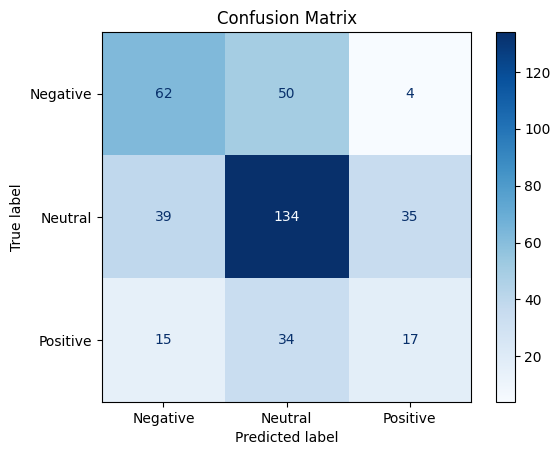


--- Examples of Misclassified Articles ---

Found 177 misclassified examples out of 390.

Showing first 100 misclassified examples:
| Headline                                                                                               | true_label   | predicted_label   |
|:-------------------------------------------------------------------------------------------------------|:-------------|:------------------|
| 22 ਮਛੇਰੇ ਭਾਰਤ ਪੁੱਜੇ                                                                                         | Neutral      | Negative          |
| Apple iPhone: ਆਈਫੋਨ ਦੀਆਂ ਕੀਮਤਾਂ 50% ਤੱਕ ਵਧਣ ਦੇ ਆਸਾਰ                                                         | Neutral      | Positive          |
| PM Modi in France: ਮੋਦੀ ਫਰਾਂਸ ਦੇ ਬੰਦਰਗਾਹ ਸ਼ਹਿਰ ਮਾਰਸੇਲੀ ਪਹੁੰਚੇ, ਨਵੇਂ ਕੌਂਸਲੇਟ ਜਨਰਲ ਦਾ ਉਦਘਾਟਨ ਕਰਨਗੇ                      | Negative     | Positive          |
| ਸੰਯੁਕਤ ਰਾਸ਼ਟਰ ਸਲਾਮਤੀ ਕੌਂਸਲ ਵੱਲੋਂ ਪਹਿਲਗਾਮ ਹਮਲੇ ਦੀ ਜ਼ੋਰਦਾਰ ਸ਼ਬਦਾਂ ’ਚ ਨਿਖੇਧੀ                                            | Neutral      |

In [ ]:
# -*- coding: utf-8 -*-
# STEP 3: ERROR ANALYSIS SCRIPT

import torch
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset # To load original CSV if needed
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer, # Use standard Trainer for prediction
    TrainingArguments, # Need this to initialize Trainer
    DataCollatorWithPadding
)
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import logging
import os

# --- Configuration ---
# *** IMPORTANT: Set this to the path where your BEST model was saved ***
saved_model_path = "punjabi-news-sentiment-indic-bert_lr1e-5_epochs5_final"
# *** IMPORTANT: Set this to the path of your ORIGINAL UNTOKENIZED test CSV file ***
original_test_csv = 'test_set.csv'
text_column_name = 'Headline' # The column name in your CSV with the text

# Check if model path exists
if not os.path.isdir(saved_model_path):
    print(f"Error: Saved model directory not found at '{saved_model_path}'")
    print("Please ensure the path is correct.")
    # Stop execution if path is wrong
    raise FileNotFoundError(f"Model directory not found: {saved_model_path}")

# Check if CSV path exists
if not os.path.isfile(original_test_csv):
    print(f"Error: Original test CSV file not found at '{original_test_csv}'")
    print("Please ensure the path is correct.")
    # Stop execution if path is wrong
    raise FileNotFoundError(f"Original test CSV not found: {original_test_csv}")


# --- Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- Define Label Mapping (Should match training) ---
# Using the standard mapping confirmed earlier. Adjust if yours was different.
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
label_names = list(id2label.values()) # For reports

# --- Determine Device ---
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU available.")
elif torch.backends.mps.is_available():
     device = torch.device("mps")
     print("MPS available (Apple Silicon).")
else:
    device = torch.device("cpu")
    print("GPU/MPS not available. Using CPU.")

# --- Load Fine-Tuned Model and Tokenizer ---
print(f"\n--- Loading fine-tuned model and tokenizer from: {saved_model_path} ---")
try:
    model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
    tokenizer = AutoTokenizer.from_pretrained(saved_model_path)
    model.to(device) # Move model to the appropriate device
    model.eval() # Set model to evaluation mode (important!)
    print("Model and tokenizer loaded successfully.")
except Exception as e:
    print(f"Error loading model or tokenizer: {e}")
    raise RuntimeError(f"Failed loading model/tokenizer: {e}")

# --- Load and Tokenize Test Data ---
# We load the original CSV to easily get the text alongside predictions.
# We'll tokenize it on the fly here.
print(f"\n--- Loading and tokenizing test data from: {original_test_csv} ---")
try:
    # Load the raw dataset
    raw_test_dataset = load_dataset('csv', data_files={'test': original_test_csv})['test']

    # Define tokenization function
    def tokenize_function(examples):
        return tokenizer(examples[text_column_name], padding=False, truncation=True, max_length=512) # Padding handled by collator

    # Tokenize the raw data
    tokenized_test_dataset = raw_test_dataset.map(tokenize_function, batched=True)

    # Ensure 'labels' column exists and map labels if needed (assuming original CSV has string labels)
    if 'Sentiment' in tokenized_test_dataset.column_names and 'labels' not in tokenized_test_dataset.column_names:
         print("Mapping string labels ('Sentiment' column) to integers ('labels' column)...")
         tokenized_test_dataset = tokenized_test_dataset.map(lambda x: {'labels': label2id.get(x['Sentiment'], -1)})

    elif 'labels' not in tokenized_test_dataset.column_names:
        raise ValueError("Dataset needs a column named 'labels' (integer form) or 'Sentiment' (string form) for evaluation.")


    columns_to_keep = ['input_ids', 'attention_mask', 'labels']

    if text_column_name in tokenized_test_dataset.column_names:
         columns_to_keep.append(text_column_name)
    tokenized_test_dataset = tokenized_test_dataset.remove_columns(
        [col for col in tokenized_test_dataset.column_names if col not in columns_to_keep]
    )
    tokenized_test_dataset.set_format("torch")
    print("Test data loaded and tokenized.")
    print(tokenized_test_dataset)

except Exception as e:
    print(f"Error loading or tokenizing test data: {e}")
    raise RuntimeError(f"Failed loading/tokenizing data: {e}")



print("\n--- Getting predictions on the test set ---")


temp_training_args = TrainingArguments(
    output_dir="./temp_eval_results",
    per_device_eval_batch_size=16,
    do_train=False,
    do_eval=False,
    do_predict=True,
    report_to="none",
    use_mps_device=torch.backends.mps.is_available()
)

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


predictor = Trainer(
    model=model,
    args=temp_training_args,

)

# Get predictions
try:
    predictions_output = predictor.predict(tokenized_test_dataset)
    raw_predictions = predictions_output.predictions # These are the logits
    true_labels = predictions_output.label_ids
    # Convert logits to predicted class IDs
    predicted_labels = np.argmax(raw_predictions, axis=-1)
    print("Predictions obtained successfully.")
except Exception as e:
    print(f"Error during prediction: {e}")
    raise RuntimeError(f"Failed during prediction: {e}")

# --- Perform Error Analysis ---
print("\n--- Error Analysis ---")

# 1. Classification Report (Precision, Recall, F1 per class)
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=label_names))

# 2. Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(true_labels, predicted_labels)
print(cm)

# 3. Display Confusion Matrix Plot
print("\nPlotting Confusion Matrix...")
try:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()
except Exception as plot_e:
     print(f"Could not plot confusion matrix: {plot_e}. Ensure matplotlib is installed.")



print("\n--- Examples of Misclassified Articles ---")
# Load the original CSV again into pandas to easily access text
try:
    test_df = pd.read_csv(original_test_csv)

    if len(test_df) == len(predicted_labels):
        test_df['predicted_label_id'] = predicted_labels
        test_df['true_label_id'] = true_labels
        test_df['predicted_label'] = test_df['predicted_label_id'].map(id2label)
        # Assuming the original CSV had 'Sentiment' column for true labels
        if 'Sentiment' in test_df.columns:
             test_df['true_label'] = test_df['Sentiment']
        else: # If original CSV had integer labels, map them back
             test_df['true_label'] = test_df['true_label_id'].map(id2label)

        # Filter for misclassified examples
        misclassified_df = test_df[test_df['predicted_label_id'] != test_df['true_label_id']]

        print(f"\nFound {len(misclassified_df)} misclassified examples out of {len(test_df)}.")

        # Display first few misclassified examples
        if not misclassified_df.empty:
             print("\nShowing first 100 misclassified examples:")
             pd.set_option('display.max_colwidth', 200) # Show more text
             print(misclassified_df[[text_column_name, 'true_label', 'predicted_label']].head(100).to_markdown(index=False))
        else:
             print("\nCongratulations! No misclassified examples found on the test set.")

    else:
        print(f"Warning: Length mismatch between DataFrame ({len(test_df)}) and predictions ({len(predicted_labels)}). Cannot show misclassified text examples easily.")
        # Print IDs instead if lengths mismatch
        print("\nMisclassified indices (True Label ID -> Predicted Label ID):")
        count = 0
        for i in range(len(predicted_labels)):
             if predicted_labels[i] != true_labels[i]:
                 print(f"Index {i}: True={true_labels[i]}({id2label[true_labels[i]]}) -> Predicted={predicted_labels[i]}({id2label[predicted_labels[i]]})")
                 count += 1
                 if count >= 20: # Limit output
                      break

except Exception as df_e:
     print(f"Error processing DataFrame or showing examples: {df_e}")


print("\n--- Error Analysis Script finished. ---")

## USING XLM ROBERTA

In [ ]:
pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 1.1 MB/s eta 0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


#DATA SPLITTING

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import sys

input_file = 'punjabi_news_sentiment_labelled_dataset_finall_3june.csv'

if not os.path.exists(input_file):
    print(f"Error: {input_file} not found.")
    sys.exit()

try:
    df = pd.read_csv(input_file, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(input_file, encoding='latin1')

df = df.dropna(subset=['Headline', 'Sentiment'])

# Split 1: 10% Test
train_val, test = train_test_split(
    df,
    test_size=0.10,
    random_state=42,
    stratify=df['Sentiment']
)

# Split 2: 10% Validation (0.1111 of the remaining 90%)
train, val = train_test_split(
    train_val,
    test_size=0.1111,
    random_state=42,
    stratify=train_val['Sentiment']
)

train.to_csv('train_set.csv', index=False)
val.to_csv('validation_set.csv', index=False)
test.to_csv('test_set.csv', index=False)

print(f"Train rows: {len(train)}")
print(f"Val rows:   {len(val)}")
print(f"Test rows:  {len(test)}")

Train rows: 2912
Val rows:   364
Test rows:  365


#TOKENIZATION


In [3]:

# STEP 1: TOKENIZATION SCRIPT (L3Cube-Punjabi-BERT)
# Saves output to Google Drive for safety.

from google.colab import drive
import pandas as pd
from datasets import load_dataset, ClassLabel
from transformers import AutoTokenizer
import logging
import os
import shutil

# --- 1. Mount Google Drive ---
drive.mount('/content/drive')

# --- Configuration ---
# Input CSVs (These should be in your Colab Files tab from Step 0)
train_csv = 'train_set.csv'
validation_csv = 'validation_set.csv'
test_csv = 'test_set.csv'

# Column Headers
text_column = 'Headline'
label_column = 'Sentiment'

# MODEL: L3Cube Punjabi BERT
model_checkpoint = "l3cube-pune/punjabi-bert"


max_token_length = 256


DRIVE_ROOT = "/content/drive/MyDrive/Punjabi_Sentiment_Project"
saved_tokenized_dataset_path = f"{DRIVE_ROOT}/tokenized_l3cube"

# --- Logging & Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# Clear old cache if it exists to ensure a fresh start
if os.path.exists(saved_tokenized_dataset_path):
    print(f"🧹 Clearing old data at {saved_tokenized_dataset_path}...")
    shutil.rmtree(saved_tokenized_dataset_path)

# --- 2. Load Data ---
print("\n--- Loading Data ---")
if not all(os.path.exists(f) for f in [train_csv, validation_csv, test_csv]):
    print("❌ Error: Input CSV files not found.")
    print("   -> Did you run Step 0 (Splitting) after the restart?")
    exit()

try:
    raw_datasets = load_dataset('csv', data_files={'train': train_csv, 'validation': validation_csv, 'test': test_csv})

    # Filter out empty rows just in case
    for split in raw_datasets:
        raw_datasets[split] = raw_datasets[split].filter(
            lambda x: x[label_column] is not None and x[text_column] is not None
        )
    print("✅ Data Loaded Successfully.")

except Exception as e:
    print(f"❌ Error loading data: {e}")
    exit()

# --- 3. Prepare Labels ---
print("\n--- Processing Labels ---")
try:
    # Find unique labels (e.g., Negative, Neutral, Positive)
    unique_labels = sorted(list(set(str(lbl).strip() for lbl in raw_datasets['train'][label_column])))
    class_label_feature = ClassLabel(names=unique_labels)
    label2id = {label: i for i, label in enumerate(unique_labels)}

    print(f"Labels found: {unique_labels}")

    def map_labels(batch):
        batch['labels'] = [label2id.get(str(l).strip(), -1) for l in batch[label_column]]
        return batch

    raw_datasets = raw_datasets.map(map_labels, batched=True)

    # Cast 'labels' column to ClassLabel type for the Trainer
    new_features = raw_datasets['train'].features.copy()
    new_features['labels'] = class_label_feature
    raw_datasets = raw_datasets.cast(new_features)

except Exception as e:
    print(f"❌ Error preparing labels: {e}")
    exit()

# --- 4. Tokenization ---
print(f"\n--- Tokenizing with {model_checkpoint} ---")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

    def tokenize_function(examples):
        text_batch = [str(t) for t in examples[text_column]]
        return tokenizer(text_batch, padding="max_length", truncation=True, max_length=max_token_length)

    tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

    # Remove raw text columns to save space, keep only tensors
    cols_to_remove = [c for c in tokenized_datasets['train'].column_names if c not in ['input_ids', 'attention_mask', 'labels']]
    tokenized_datasets = tokenized_datasets.remove_columns(cols_to_remove)
    tokenized_datasets.set_format("torch")

except Exception as e:
    print(f"❌ Error during tokenization: {e}")
    exit()

# --- 5. Save to Google Drive ---
print(f"\n💾 Saving processed data to: {saved_tokenized_dataset_path} ...")
try:
    tokenized_datasets.save_to_disk(saved_tokenized_dataset_path)
    print("✅ SUCCESS! Data saved to Drive.")
    print("👉 You can now run Step 2 (Fine-Tuning).")
except Exception as e:
    print(f"❌ Error saving to Drive: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🧹 Clearing old data at /content/drive/MyDrive/Punjabi_Sentiment_Project/tokenized_l3cube...

--- Loading Data ---


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Filter:   0%|          | 0/2912 [00:00<?, ? examples/s]

Filter:   0%|          | 0/364 [00:00<?, ? examples/s]

Filter:   0%|          | 0/365 [00:00<?, ? examples/s]

✅ Data Loaded Successfully.

--- Processing Labels ---
Labels found: ['Negative', 'Neutral', 'Positive']


Map:   0%|          | 0/2912 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/2912 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/364 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/365 [00:00<?, ? examples/s]


--- Tokenizing with l3cube-pune/punjabi-bert ---


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/452 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Map:   0%|          | 0/2912 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

Map:   0%|          | 0/365 [00:00<?, ? examples/s]


💾 Saving processed data to: /content/drive/MyDrive/Punjabi_Sentiment_Project/tokenized_l3cube ...


Saving the dataset (0/1 shards):   0%|          | 0/2912 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/364 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/365 [00:00<?, ? examples/s]

✅ SUCCESS! Data saved to Drive.
👉 You can now run Step 2 (Fine-Tuning).


In [ ]:
!pip install --upgrade transformers accelerate
!pip install --upgrade datasets scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: Operation cancelled by user
^C


In [5]:


import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from datasets import load_from_disk, ClassLabel
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
import logging
import gc

# --- Configuration ---
model_checkpoint = "google/muril-large-cased"
output_model_name = "punjabi-news-sentiment-muril-large"
checkpoints_dir = output_model_name + "_checkpoints"
saved_tokenized_dataset_path = "./tokenized_punjabi_news_muril_large"

logging.basicConfig(level=logging.INFO, format='%(asctime)s : %(levelname)s : %(message)s')

# --- 1. Load Data ---
print(f"Loading data from {saved_tokenized_dataset_path}...")
try:
    tokenized_datasets = load_from_disk(saved_tokenized_dataset_path)
    print("✅ Dataset loaded.")
except Exception as e:
    print(f"❌ Error loading data: {e}. (Did you run Step 1 again after the crash?)")
    exit()

# --- 2. Label Mapping ---
label_feature = tokenized_datasets['train'].features['labels']
id2label = {i: name for i, name in enumerate(label_feature.names)}
label2id = {name: i for i, name in id2label.items()}
num_labels = len(id2label)

# --- 3. Load Model ---
print(f"Loading model: {model_checkpoint}...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True
)
model.to(device)

# --- 4. Metrics ---
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions, average="weighted", zero_division=0)
    return {"accuracy": acc, "f1": f1}

# --- 5. Class Weights ---
train_labels = np.array(tokenized_datasets["train"]["labels"])
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_labels),
    y=train_labels
)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).to(device)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels", None)
        if labels is None:
            return super().compute_loss(model, inputs, return_outputs, **kwargs)

        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights_tensor.to(logits.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

# --- 6. Training Arguments (STABILITY FOCUSED) ---
# Clean memory before starting
gc.collect()
torch.cuda.empty_cache()

training_args = TrainingArguments(
    output_dir=checkpoints_dir,
    learning_rate=2e-5,

    # --- CRITICAL SETTINGS FOR STABILITY ---
    per_device_train_batch_size=4,   # Reduced from 8 to 4
    per_device_eval_batch_size=8,    # Keep eval small
    gradient_accumulation_steps=8,   # Increased to 8 (Effective Batch = 32)
    gradient_checkpointing=True,     # SAVES MASSIVE VRAM (Must be True for Large models)
    dataloader_num_workers=0,        # SAVES SYSTEM RAM (Prevents the crash you saw)
    fp16=True,                       # Keep FP16 for speed
    # ---------------------------------------

    num_train_epochs=6,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=50,
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_total_limit=1,
    report_to=[],
)

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

print("--- Starting Training (Stability Mode) ---")
trainer.train()

print("--- Saving Final Model ---")
trainer.save_model(output_model_name + "_final")
tokenizer.save_pretrained(output_model_name + "_final")

print("\n--- Evaluation on Test Set ---")
metrics = trainer.evaluate(tokenized_datasets["test"])
print(metrics)

Loading data from ./tokenized_punjabi_news_muril_large...
❌ Error loading data: Directory ./tokenized_punjabi_news_muril_large not found. (Did you run Step 1 again after the crash?)
Loading model: google/muril-large-cased...
Device: cuda


config.json:   0%|          | 0.00/406 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.03G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.03G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-large-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/tmp/ipython-input-277024443.py:120: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(


--- Starting Training (Stability Mode) ---


Step,Training Loss,Validation Loss,Accuracy,F1
50,1.045500,0.958758,0.601648,0.580123
100,0.924200,0.838869,0.629121,0.632601
150,0.823200,0.807753,0.620879,0.616390
200,0.760400,0.807613,0.563187,0.558560
250,0.682900,0.799104,0.651099,0.654745
300,0.618700,0.826752,0.634615,0.641929
350,0.531900,0.841079,0.673077,0.672860
400,0.451200,0.902026,0.631868,0.637636
450,0.405200,0.936509,0.618132,0.624812
500,0.339200,0.923428,0.640110,0.645210


--- Saving Final Model ---

--- Evaluation on Test Set ---


{'eval_loss': 0.7788013815879822, 'eval_accuracy': 0.684931506849315, 'eval_f1': 0.6844731752712344, 'eval_runtime': 4.0216, 'eval_samples_per_second': 90.759, 'eval_steps_per_second': 11.438, 'epoch': 6.0}


In [7]:
!pip install transformers==4.41.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.22.1
    Uninstalling tokenizers-0.22.1:
      Successfully uninstalled tokenizers-0.22.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.2
    Uninstalling transformers-4.57.2:
      Successfully uninstalled transformers-4.57.2


In [1]:
import os
from google.colab import drive

# 1. Mount Drive
drive.mount('/content/drive')

# 2. Define the path where we saved everything
search_path = "/content/drive/MyDrive/Punjabi_Sentiment_Project"

print(f"\n📂 SEARCHING INSIDE: {search_path}\n" + "-"*40)

# 3. List all files and folders
if os.path.exists(search_path):
    contents = os.listdir(search_path)

    found_model = False
    for item in contents:
        print(f"📄 Found: {item}")
        if "_final" in item or "checkpoint" in item:
            found_model = True
            print(f"   >>> ✅ THIS LOOKS LIKE A MODEL! Copy this name: '{item}'")

    if not found_model:
        print("\n❌ No model folders found (no '_final' or 'checkpoints').")
        print("   Did the training script finish? You might need to re-run training.")
else:
    print(f"❌ Error: The folder '{search_path}' does not exist in your Drive.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

📂 SEARCHING INSIDE: /content/drive/MyDrive/Punjabi_Sentiment_Project
----------------------------------------
📄 Found: tokenized_muril_large
📄 Found: tokenized_l3cube
📄 Found: punjabi-news-sentiment-l3cube_checkpoints
   >>> ✅ THIS LOOKS LIKE A MODEL! Copy this name: 'punjabi-news-sentiment-l3cube_checkpoints'


In [2]:
# -*- coding: utf-8 -*-
# STEP 4: SMART INFERENCE (Retry)

from google.colab import drive
import torch
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import logging
import os
import glob
import sys

# 1. Mount Drive
drive.mount('/content/drive')

# --- Configuration ---
DRIVE_ROOT = "/content/drive/MyDrive/Punjabi_Sentiment_Project"
CHECKPOINT_FOLDER = "punjabi-news-sentiment-l3cube_checkpoints"
BASE_PATH = f"{DRIVE_ROOT}/{CHECKPOINT_FOLDER}"

# --- Find Backup ---
print(f"🔎 Looking inside: {BASE_PATH} ...")

if not os.path.exists(BASE_PATH):
    print("❌ Error: Checkpoint folder not found.")
    sys.exit()

subfolders = glob.glob(f"{BASE_PATH}/checkpoint-*")
if not subfolders:
    print("❌ Error: No checkpoints found!")
    sys.exit()

# Get the latest checkpoint
latest_model_path = max(subfolders, key=lambda p: int(p.split('-')[-1]))
print(f"✅ FOUND BACKUP MODEL: {latest_model_path}")

# --- Load Model ---
print("🚀 Loading model (Attempt 2)...")
try:
    tokenizer = AutoTokenizer.from_pretrained(latest_model_path)
    model = AutoModelForSequenceClassification.from_pretrained(latest_model_path)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()
    print("✅ Success! Model loaded.")

except AttributeError:
    print("❌ Library Bug Detected: Please run '!pip install transformers==4.57.1' and Restart Runtime.")
except Exception as e:
    print(f"❌ Critical Error: {e}")
    sys.exit()

# --- Interactive Loop ---
while True:
    text = input("\n👉 Enter Headline (or 'exit'): ")
    if text.lower() in ['exit', 'quit']: break
    if not text.strip(): continue

    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding=True).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
        pred_idx = torch.argmax(probs, dim=-1).item()
        confidence = probs[0][pred_idx].item()
        sentiment = model.config.id2label[pred_idx]

    print(f"📊 Result: {sentiment} ({confidence:.1%})")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔎 Looking inside: /content/drive/MyDrive/Punjabi_Sentiment_Project/punjabi-news-sentiment-l3cube_checkpoints ...
✅ FOUND BACKUP MODEL: /content/drive/MyDrive/Punjabi_Sentiment_Project/punjabi-news-sentiment-l3cube_checkpoints/checkpoint-200
🚀 Loading model (Attempt 2)...
✅ Success! Model loaded.

👉 Enter Headline (or 'exit'): ਸੈਟਲਾਈਟ ਤਸਵੀਰਾਂ: ਸਿੰਧੂ ਜਲ ਸੰਧੀ ਮੁਅੱਤਲ ਹੋਣ ਤੋਂ ਬਾਅਦ ਚਨਾਬ ਦੇ ਪਾਣੀ ਦਾ ਪੱਧਰ ਘਟਿਆ ਨਜ਼ਰ ਆਇਆ
📊 Result: Negative (54.7%)

👉 Enter Headline (or 'exit'): Raut defends Kunal Kamra: ਸੰਜੈ ਰਾਊਤ ਮਜ਼ਾਹੀਆ ਕਲਾਕਾਰ ਕੁਨਾਲ ਕਾਮਰਾ ਦੇ ਹੱਕ ’ਚ ਨਿੱਤਰੇ
📊 Result: Positive (42.0%)


KeyboardInterrupt: Interrupted by user